In [1]:
#Use conda env open2c_env.yml to create conda env for this script
#This is an example script of plotting MC-3C data
#It is run from within the 'scripts' subdirectory, using following directory structure:
#Analysis_Dir
#├── data
#    ├── permutations
#├── alignments
#├── figures
#├── scripts
#├── lsf_jobs

In [28]:
import bioframe
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import random
import seaborn as sns
import scipy
import pickle
from numpy import diff

from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

%matplotlib inline

In [29]:
conditions = [
    'Ctrl_R1',
    'IAA_R1',
    'ICRF_R1',
    'IAA_ICRF_R1',
    'Ctrl_R2',
    'IAA_R2',
    'ICRF_R2',
    'IAA_ICRF_R2',
    'Ctrl_R3',
    'IAA_R3', 
    'ICRF_R3',
    'IAA_ICRF_R3'
]

long_names = {
    'Ctrl_R1' : 'TI-MC3C-Ctrl-R1-4-40',
    'IAA_R1' : 'TI-MC3C-IAA-R1-4-40',
    'ICRF_R1' : 'TI-MC3C-ICRF-R1-4-40',
    'IAA_ICRF_R1' : 'TI-MC3C-IAA-ICRF-R1-4-40',
    'Ctrl_R2' : 'TI-MC3C-Dpn-Ctrl-R3-5-06',
    'IAA_R2' : 'TI-MC3C-Dpn-IAA-R3-5-06',
    'ICRF_R2' : 'TI-MC3C-Dpn-ICRF-R3-5-06',
    'IAA_ICRF_R2' : 'TI-MC3C-Dpn-IAA-ICRF-R3-5-06',
    'Ctrl_R3' : 'TI-MC3C-Dpn-Ctrl-R4-5-13',
    'IAA_R3' : 'TI-MC3C-Dpn-IAA-R4-5-13', 
    'ICRF_R3' : 'TI-MC3C-Dpn-ICRF-R4-5-13',
    'IAA_ICRF_R3' : 'TI-MC3C-Dpn-IAA-ICRF-R4-5-13'
}

In [30]:
sampleColors = {
    'Ctrl_R1' : '#17BECF',
    'IAA_R1' : '#574D68',
    'ICRF_R1' : '#D62728',
    'IAA_ICRF_R1' : '#C6A15B',
    'Ctrl_R2' : '#17BECF',
    'IAA_R2' : '#574D68',
    'ICRF_R2' : '#D62728',
    'IAA_ICRF_R2' : '#C6A15B',
    'Ctrl_R3' : '#17BECF',
    'IAA_R3' : '#574D68',
    'ICRF_R3' : '#D62728',
    'IAA_ICRF_R3' : '#C6A15B'
}
    
sampleLineStyles = {
    'Ctrl_R1' : '-',
    'IAA_R1' : '-',
    'ICRF_R1' : '-',
    'IAA_ICRF_R1' : '-',
    'Ctrl_R2' : '--',
    'IAA_R2' : '--',
    'ICRF_R2' : '--',
    'IAA_ICRF_R2' : '--',
    'Ctrl_R3' : ':',
    'IAA_R3' : ':',
    'ICRF_R3' : ':',
    'IAA_ICRF_R3' : ':'
}

samplePlotNames = {
    'Ctrl_R1' : 'Ctrl_R1',
    'IAA_R1' : 'IAA_R1',
    'ICRF_R1' : 'ICRF_R1',
    'IAA_ICRF_R1' : 'IAA_ICRF_R1',
    'Ctrl_R2' : 'Ctrl_R2',
    'IAA_R2' : 'IAA_R2',
    'ICRF_R2' : 'ICRF_R2',
    'IAA_ICRF_R2' : 'IAA_ICRF_R2',
    'Ctrl_R3' : 'Ctrl_R3',
    'IAA_R3' : 'IAA_R3',
    'ICRF_R3' : 'ICRF_R3',
    'IAA_ICRF_R3' : 'IAA_ICRF_R3'
}

In [31]:
ctrlconds = [
    'Ctrl_R1',
    'Ctrl_R1',
    'Ctrl_R1',
    'Ctrl_R2',
    'Ctrl_R2',
    'Ctrl_R2',
    'Ctrl_R3',
    'Ctrl_R3',
    'Ctrl_R3'
]

treatconds = [
    'IAA_R1',
    'ICRF_R1',
    'IAA_ICRF_R1',
    'IAA_R2',
    'ICRF_R2',
    'IAA_ICRF_R2',
    'IAA_R3',
    'ICRF_R3',
    'IAA_ICRF_R3'
]

In [32]:
repdict = {
    'Ctrl_R1' : 'R1',
    'IAA_R1' : 'R1',
    'ICRF_R1' : 'R1',
    'IAA_ICRF_R1' : 'R1',
    'Ctrl_R2' : 'R2',
    'IAA_R2' : 'R2',
    'ICRF_R2' : 'R2',    
    'IAA_ICRF_R2' : 'R2',
    'Ctrl_R3' : 'R3',
    'IAA_R3' : 'R3',
    'ICRF_R3' : 'R3',    
    'IAA_ICRF_R3' : 'R3'
}

labeldict = {
    'Ctrl_R1' : 'Control',
    'IAA_R1' : 'IAA',
    'ICRF_R1' : 'ICRF-193',
    'IAA_ICRF_R1' : 'IAA + ICRF-193',
    'Ctrl_R2' : 'Control',
    'IAA_R2': 'IAA',
    'ICRF_R2' : 'ICRF-193',  
    'IAA_ICRF_R2' : 'IAA + ICRF-193',
    'Ctrl_R3' : 'Control',
    'IAA_R3': 'IAA',
    'ICRF_R3' : 'ICRF-193',  
    'IAA_ICRF_R3' : 'IAA + ICRF-193'
}

labelPlotColors = {
    'Control' : '#17BECF',
    'IAA' : '#574D68',
    'ICRF-193' : '#D62728',
    'IAA + ICRF-193' : '#C6A15B',
}


In [33]:
#For each of the above, can separate by A vs B compartments, or by number of chromosomes visited
comp_types = ['A', 'B', 'AB']

In [34]:
outDataDir = '..'

In [35]:
#Read in pickled files

f = open(f'{outDataDir}/data/Rad21ICRF_R1R2R3_real_walks_with_summary_firstx_length_fractions_dict_100kbEigs.pkl', 'rb')
real_walks_with_summary_firstx = pickle.load(f)
f.close()

f = open(f'{outDataDir}/data/Rad21ICRF_R1R2R3_real_walks_filtered_summarized_firstx_length_dict_100kbEigs.pkl', 'rb')
real_walks_summarized_firstx = pickle.load(f)
f.close()

In [36]:
#Kernel density plots of pairwise distance - overlay - 1 or 2 chrom walks, A, B, or AB compartments
#Just first 6 steps of walks

dist_df = pd.DataFrame()

#combine biological replicates
for i, cond in enumerate(conditions):
    df = real_walks_with_summary_firstx[cond]['length_6']
    df['Query_Fragment_Length'] = df['Query_End'] - df['Query_Start']
    grouped_walks = df.groupby('Query_Name')
    walks_min_mapq = grouped_walks.agg({'Mapping_Quality' : 'min'})
    good_walks_mapq = walks_min_mapq[walks_min_mapq['Mapping_Quality'] > 59] #use this to filter for mapq
    walks_frac_map = grouped_walks.agg({'Match_Length' : 'sum',
                                    'Query_Fragment_Length' : 'sum',
                                    'Alignment_Length' : 'sum'
                                   })
    walks_high_frac_map = walks_frac_map[
        (walks_frac_map['Match_Length']/walks_frac_map['Query_Fragment_Length']) > 0.8]
    #use this to filter for fraction mapped

    cond1_filtered = df[
        (df['Chrom_Number'] < 3) &
        (df['Walk_Comp_Type'].isin(['A', 'B', 'AB'])) &
        (df['Query_Name'].isin(good_walks_mapq.index)) &
        (df['Query_Name'].isin(walks_high_frac_map.index))]
    dist_dropna = pd.DataFrame({'Dist' : cond1_filtered['dist'].copy(),
                               'Condition' : cond,
                               'Label' : labeldict[cond],
                               'Replicate' : repdict[cond]})
    dist_dropna = dist_dropna.replace([np.inf, -np.inf], np.nan).dropna()
    dist_dropna['Abs_Dist'] = abs(dist_dropna['Dist']).replace([np.inf, -np.inf], np.nan).dropna()    
    dist_df = dist_df.append(dist_dropna[dist_dropna['Abs_Dist'] > 0], ignore_index = True)

/tmp/ipykernel_2912086/659879566.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dist_df = dist_df.append(dist_dropna[dist_dropna['Abs_Dist'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/659879566.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dist_df = dist_df.append(dist_dropna[dist_dropna['Abs_Dist'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/659879566.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dist_df = dist_df.append(dist_dropna[dist_dropna['Abs_Dist'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/659879566.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dist_df = dist_df.append(dist_dropna

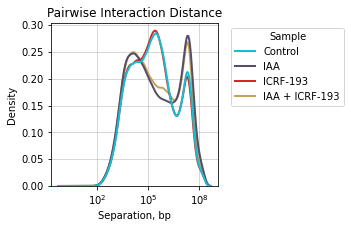

In [37]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])

g = sns.kdeplot(data = dist_df, x = 'Abs_Dist', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Pairwise Interaction Distance')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')
plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_Combined_Density_Dist_LogScaleKde_DropNA.png', bbox_inches = 'tight', dpi = 300)

In [38]:
from scipy import signal

In [39]:
#Calculating location of peaks in each dataset

In [40]:
peak_list = pd.DataFrame(columns = ['Label', 'PeakNum', 'PeakSize(bp)', 'Prominence'])

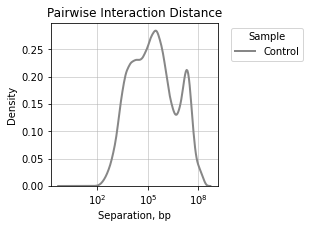

In [41]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = dist_df[dist_df['Label'] == 'Control'], x = 'Abs_Dist', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Pairwise Interaction Distance')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [42]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.0001)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'Control',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/588494748.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/588494748.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/588494748.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


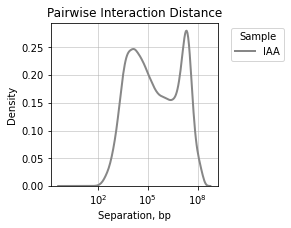

In [43]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = dist_df[dist_df['Label'] == 'IAA'], x = 'Abs_Dist', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Pairwise Interaction Distance')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [44]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.0001)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'IAA',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/2980812505.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/2980812505.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


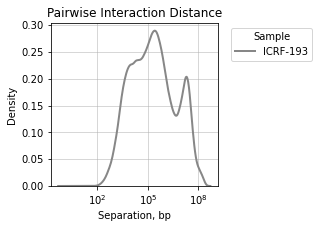

In [45]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = dist_df[dist_df['Label'] == 'ICRF-193'], x = 'Abs_Dist', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Pairwise Interaction Distance')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [46]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.0001)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'ICRF-193',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/3025997333.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/3025997333.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/3025997333.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


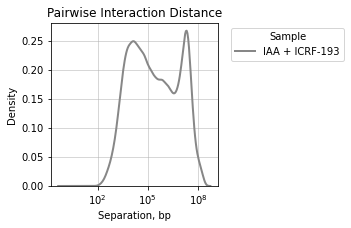

In [47]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = dist_df[dist_df['Label'] == 'IAA + ICRF-193'], x = 'Abs_Dist', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Pairwise Interaction Distance')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [48]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.0001)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'IAA + ICRF-193',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
 

/tmp/ipykernel_2912086/2294387273.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/2294387273.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


In [49]:
peak_list

,Label,PeakNum,PeakSize(bp),Prominence
0,Control,0,22562.104813,0.000179
1,Control,1,276816.071061,0.284322
2,Control,2,20056012.902944,0.082244
3,IAA,0,13318.926949,0.092024
4,IAA,1,22102501.230619,0.280126
5,ICRF-193,0,7.967497,0.00014
6,ICRF-193,1,249312.898283,0.289506
7,ICRF-193,2,20132320.52601,0.072726
8,IAA + ICRF-193,0,13291.234707,0.089899
9,IAA + ICRF-193,1,21039086.214678,0.267678


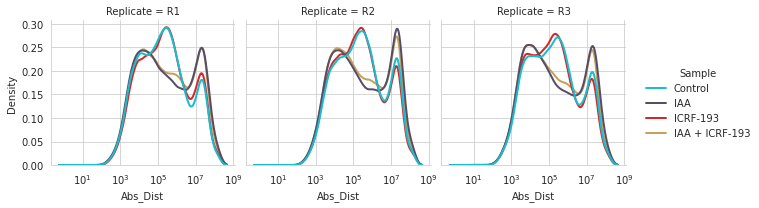

In [50]:
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])
with sns.axes_style("whitegrid"):
    g = sns.displot(kind='kde', data=dist_df, col='Replicate', x='Abs_Dist', hue='Label', 
                    palette = cmap_bar, log_scale = True, common_norm = False, common_grid = True, 
                    lw = 2, facet_kws={'sharey': True}, height = 3)
    g._legend.set_title('Sample')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_Separate_Density_Dist_LogScaleKde_DropNA.png', bbox_inches = 'tight', dpi = 300)

In [51]:
#walk span plot

In [52]:
#Kernel density plots of walk span - overlay - 1 or 2 chrom walks, A, B, or AB compartments
#Just good chromosome walks here
#Just first 6 steps of walks

span_df = pd.DataFrame()

#combine biological replicates
for i, cond in enumerate(conditions):
    df = real_walks_with_summary_firstx[cond]['length_6']
    df['Query_Fragment_Length'] = df['Query_End'] - df['Query_Start']
    grouped_walks = df.groupby('Query_Name')
    walks_min_mapq = grouped_walks.agg({'Mapping_Quality' : 'min'})
    good_walks_mapq = walks_min_mapq[walks_min_mapq['Mapping_Quality'] > 59] #use this to filter for mapq
    walks_frac_map = grouped_walks.agg({'Match_Length' : 'sum',
                                    'Query_Fragment_Length' : 'sum',
                                    'Alignment_Length' : 'sum'})
    walks_high_frac_map = walks_frac_map[
        (walks_frac_map['Match_Length']/walks_frac_map['Query_Fragment_Length']) > 0.8]
    #use this to filter for fraction mapped

    df2 = real_walks_summarized_firstx[cond]['length_6']
    cond1_filtered = df2[
        (df2['Chrom_Number'] == 1) &
        (df2['Walk_Comp_Type'].isin(['A', 'B', 'AB'])) &
        (df2['Query_Name'].isin(good_walks_mapq.index)) &
        (df2['Query_Name'].isin(walks_high_frac_map.index))]
    dist_dropna = pd.DataFrame({'Span' : cond1_filtered['Span'].copy(),
                               'Condition' : cond,
                               'Label' : labeldict[cond],
                               'Replicate' : repdict[cond]})
    dist_dropna = dist_dropna.replace([np.inf, -np.inf], np.nan).dropna()
    dist_dropna['Abs_Span'] = abs(dist_dropna['Span']).replace([np.inf, -np.inf], np.nan).dropna()     
    span_df = span_df.append(dist_dropna[dist_dropna['Abs_Span'] > 0], ignore_index = True)

/tmp/ipykernel_2912086/2027479922.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  span_df = span_df.append(dist_dropna[dist_dropna['Abs_Span'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/2027479922.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  span_df = span_df.append(dist_dropna[dist_dropna['Abs_Span'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/2027479922.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  span_df = span_df.append(dist_dropna[dist_dropna['Abs_Span'] > 0], ignore_index = True)
/tmp/ipykernel_2912086/2027479922.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  span_df = span_df.append(dist_dr

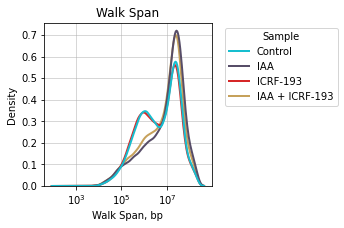

In [53]:
#Kernel density plots - overlay - 1 chrom walks, A, B, or AB compartments
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])

fig = plt.figure(figsize=(3, 3))

g = sns.kdeplot(data = span_df, x = 'Abs_Span', common_norm = False,
        hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)

sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')
plt.xlabel('Walk Span, bp')
plt.ylabel('Density')
plt.title('Walk Span')
plt.grid(lw=0.5)

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_Density_Span_Combo_1st6steps_Logbins_DropNA_100kbEigs_GoodChroms.png', bbox_inches = 'tight', dpi = 300)

In [54]:
#peak list for walk span as well

In [55]:
peak_list = pd.DataFrame(columns = ['Label', 'PeakNum', 'PeakSize(bp)', 'Prominence'])

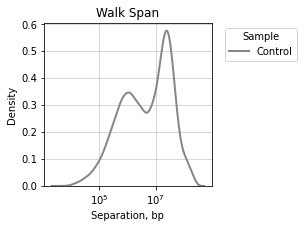

In [56]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = span_df[span_df['Label'] == 'Control'], x = 'Abs_Span', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Walk Span')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [57]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.01)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'Control',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/2252482952.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/2252482952.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


In [58]:
peak_list

,Label,PeakNum,PeakSize(bp),Prominence
0,Control,0,1083179.589203,0.074949
1,Control,1,23868488.949859,0.576125


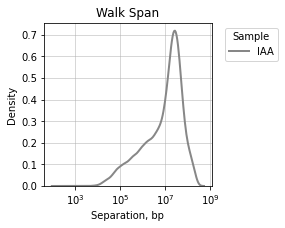

In [59]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = span_df[span_df['Label'] == 'IAA'], x = 'Abs_Span', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Walk Span')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [60]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.01)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'IAA',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/2534191086.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


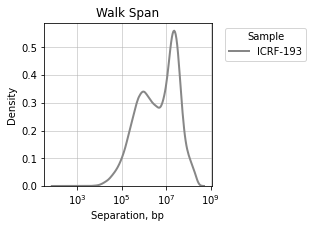

In [61]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = span_df[span_df['Label'] == 'ICRF-193'], x = 'Abs_Span', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Walk Span')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [62]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.01)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'ICRF-193',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
    

/tmp/ipykernel_2912086/2040318530.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({
/tmp/ipykernel_2912086/2040318530.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


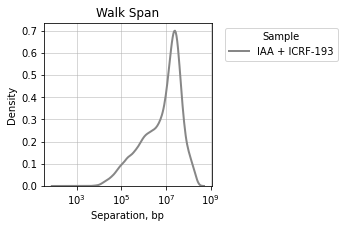

In [63]:
fig = plt.figure(figsize=(3, 3))
cmap_bar = sns.color_palette(['#878787'])

g = sns.kdeplot(data = span_df[span_df['Label'] == 'IAA + ICRF-193'], x = 'Abs_Span', common_norm = False,
    hue = 'Label', lw = 2, log_scale = True, common_grid = True, palette = cmap_bar)
plt.xlabel('Separation, bp')
plt.ylabel('Density')
plt.title('Walk Span')
plt.grid(lw=0.5)
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, 1), title='Sample')

In [64]:
#Location of peaks
#from https://stackoverflow.com/questions/63492366/python-get-fwhm-from-seaborn-kdeplot
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

kde_curve = g.lines[0]
x = kde_curve.get_xdata()
y = kde_curve.get_ydata()
peaks, properties = scipy.signal.find_peaks(y, prominence = 0.01)
for i, element in enumerate(peaks):
    xpos = x[element]
    prom = properties['prominences'][i]
    peak_list = peak_list.append({
        'Label' : 'IAA + ICRF-193',
        'PeakNum' : i,
        'PeakSize(bp)' : xpos,
        'Prominence' : prom
    }, ignore_index = True)
 

/tmp/ipykernel_2912086/327383251.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_list = peak_list.append({


In [65]:
peak_list

,Label,PeakNum,PeakSize(bp),Prominence
0,Control,0,1083179.589203,0.074949
1,Control,1,23868488.949859,0.576125
2,IAA,0,27261777.227921,0.719497
3,ICRF-193,0,975641.70364,0.058282
4,ICRF-193,1,23015054.142928,0.560437
5,IAA + ICRF-193,0,25308985.189106,0.699794


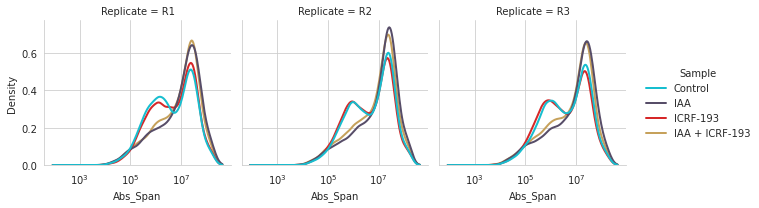

In [66]:
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])
with sns.axes_style("whitegrid"):
    g = sns.displot(kind='kde', data=span_df, col='Replicate', x='Abs_Span', hue='Label', 
                    palette = cmap_bar, log_scale = True, common_norm = False, common_grid = True, 
                    lw = 2, facet_kws={'sharey': True}, height = 3)
    g._legend.set_title('Sample')

    plt.savefig(f'{outDataDir}/figures/220518_Rad21ICRF_R1R2R3_Separate_Density_Span_LogScaleKde_DropNA.png', bbox_inches = 'tight', dpi = 300)

In [67]:
# Fraction of 1 vs >1 chromosome walks in A, B, AB

CompartmentType_ByInterChromSteps = pd.DataFrame()

for cond in conditions:
    df = real_walks_with_summary_firstx[cond]['length_6']
    df['Query_Fragment_Length'] = df['Query_End'] - df['Query_Start']
    grouped_walks = df.groupby('Query_Name')
    walks_min_mapq = grouped_walks.agg({'Mapping_Quality' : 'min'})
    good_walks_mapq = walks_min_mapq[walks_min_mapq['Mapping_Quality'] > 59] #use this to filter for mapq
    walks_frac_map = grouped_walks.agg({'Match_Length' : 'sum',
                                    'Query_Fragment_Length' : 'sum',
                                    'Alignment_Length' : 'sum'
                                   })
    walks_high_frac_map = walks_frac_map[
        (walks_frac_map['Match_Length']/walks_frac_map['Query_Fragment_Length']) > 0.8] #use this to filter for fraction mapped

    df2 = real_walks_summarized_firstx[cond]['length_6']
    cond1_filtered = df2[
        (df2['Chrom_Number'] < 3) &
        (df2['Walk_Comp_Type'].isin(['A', 'B', 'AB'])) &
        (df2['Query_Name'].isin(good_walks_mapq.index)) &
        (df2['Query_Name'].isin(walks_high_frac_map.index))]
    
    #1 chrom walks
    cis_walks = cond1_filtered[
        (cond1_filtered['Chrom_Number'] == 1)]
    cis_walks['Condition'] = cond
    cis_walks['Walk_CisTrans_Type'] = '1 chrom'
    
    #2 chrom walks
    trans_walks = cond1_filtered[
        (cond1_filtered['Chrom_Number'] == 2)]
    trans_walks['Condition'] = cond
    trans_walks['Walk_CisTrans_Type'] = '2 chrom'
    
    CompartmentType_ByInterChromSteps = CompartmentType_ByInterChromSteps.append(cis_walks, ignore_index = True)
    CompartmentType_ByInterChromSteps = CompartmentType_ByInterChromSteps.append(trans_walks, ignore_index = True)


/tmp/ipykernel_2912086/2204573710.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Condition'] = cond
/tmp/ipykernel_2912086/2204573710.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Walk_CisTrans_Type'] = '1 chrom'
/tmp/ipykernel_2912086/2204573710.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/tmp/ipykernel_2912086/2204573710.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Condition'] = cond
/tmp/ipykernel_2912086/2204573710.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Walk_CisTrans_Type'] = '1 chrom'
/tmp/ipykernel_2912086/2204573710.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

/tmp/ipykernel_2912086/2204573710.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Condition'] = cond
/tmp/ipykernel_2912086/2204573710.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_walks['Walk_CisTrans_Type'] = '1 chrom'
/tmp/ipykernel_2912086/2204573710.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [68]:
CompartmentType_ByInterChromSteps_ct = pd.crosstab(
    index=[CompartmentType_ByInterChromSteps['Condition']],
    columns=[CompartmentType_ByInterChromSteps['Chrom_Number'],
             CompartmentType_ByInterChromSteps['Walk_Comp_Type']],
    normalize = 'index')


In [69]:
#fix order
#https://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots
cond_order = ['Ctrl_R1', 'Ctrl_R2', 'Ctrl_R3', 'IAA_R1', 'IAA_R2', 'IAA_R3',
             'ICRF_R1', 'ICRF_R2', 'ICRF_R3', 'IAA_ICRF_R1', 'IAA_ICRF_R2', 'IAA_ICRF_R3']
mapping = {Condition: i for i, Condition in enumerate(cond_order)}
key = CompartmentType_ByInterChromSteps_ct.index.map(mapping)
CompartmentType_ByInterChromSteps_ct = CompartmentType_ByInterChromSteps_ct.iloc[key.argsort()]

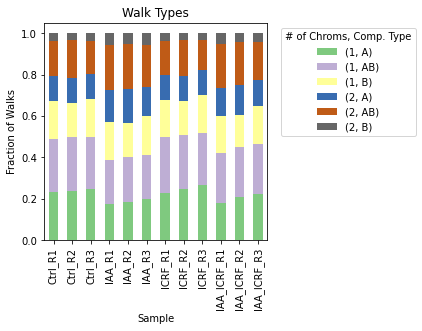

In [70]:
CompartmentType_ByInterChromSteps_ct.plot(kind = 'bar', stacked = True, use_index = True,
                                          colormap='Accent', figsize = (4, 4))
plt.xlabel('Sample')
plt.ylabel('Fraction of Walks') 
plt.title('Walk Types')
plt.legend(bbox_to_anchor=(1.04,1), title = '# of Chroms, Comp. Type')
     
plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_MC3C_CisTransByCompType_Bar_100kbbinEig1_GoodChroms.png', dpi = 300, bbox_inches = "tight")

In [71]:
CompartmentType_ByInterChromSteps_ct = pd.crosstab(
    index=[CompartmentType_ByInterChromSteps['Condition']
          ],
    columns=[CompartmentType_ByInterChromSteps['Chrom_Number'],
             CompartmentType_ByInterChromSteps['Walk_Comp_Type']])

In [72]:
CompartmentType_ByInterChromSteps_ct.sum(axis = 1)

Condition
Ctrl_R1        17685
Ctrl_R2        33201
Ctrl_R3        18435
IAA_ICRF_R1    14408
IAA_ICRF_R2    31695
IAA_ICRF_R3    15393
IAA_R1          7651
IAA_R2         28023
IAA_R3         13489
ICRF_R1        17511
ICRF_R2        27738
ICRF_R3        16172
dtype: int64

In [73]:
#Scaling plots and scaling slope - R1, R3, R4 only

In [74]:
def bedslice(grouped, chrom, start, end):
	"""Assumes no proper nesting of intervals"""
	chromdf = grouped.get_group(chrom)
	lo = chromdf['end'].values.searchsorted(start, side='right')
	hi = lo + chromdf['start'].values[lo:].searchsorted(end, side='left')
	return chromdf.iloc[lo:hi]


def intlogbins(start, end, N=None, ratio=None):
	
	start = int(start)
	end = int(end)
	if ratio is not None:
		if N is not None:
			raise ValueError("Please specify only N or ratio")
		N = np.log(end / start) / np.log(ratio)
	elif N is None:
		raise ValueError("Please specify either N or ratio")
	bins = np.logspace(np.log10(start), np.log10(end), N)
	bins = np.array(np.rint(bins), dtype=int)
	for i in range(1,len(bins)-1):
		if bins[i]==bins[i-1]:
			bins[i] = bins[i]+1
	assert np.all(bins[1:] > bins[:-1])
	assert bins[0] == start
	assert bins[-1] == end
	return bins


def geomprog(factor, start=1):
	yield start
	while True:
		start *= factor
		yield start


def _geomrange(start, end, factor, endpoint):
	prev = np.nan
	for i in geomprog(factor, start):
		x = int(round(i))
		
		if x > end:
			break

		if x == prev:
			continue
		
		prev = x
		yield x

	if endpoint and prev != end:
		yield end


def geomrange(start, end, factor, endpoint=False):
	return np.fromiter(_geomrange(start, end, factor, endpoint), dtype=int)


def geomspace(start, end, num=50, endpoint=True):
	factor = 1 + ((np.log10(end) - np.log10(start)) / num)
	return geomrange(start, end, factor, endpoint=endpoint)


def _contact_areas(distbins, scaffold_length):
	distbins = distbins.astype(float)
	scaffold_length = float(scaffold_length)
	outer_areas = np.maximum(scaffold_length - distbins[:-1], 0) ** 2
	inner_areas = np.maximum(scaffold_length - distbins[1: ], 0) ** 2
	return 0.5 * (outer_areas - inner_areas)
	

def contact_areas(distbins, region1, region2):
	if region1 == region2:
		start, end = region1
		areas = _contact_areas(distbins, end - start)
	else:
		start1, end1 = region1
		start2, end2 = region2
		if start2 <= start1:
			start1, start2 = start2, start1
			end1, end2 = end2, end1
		areas = (
			_contact_areas(distbins, end2 - start1) -
			_contact_areas(distbins, start2 - start1) -
			_contact_areas(distbins, end2 - end1)
		)
		if end1 < start2:
			areas += _contact_areas(distbins, start2 - end1)
	
	return areas

In [75]:
def scaling_on_go(input_df):
    chromosomes=list(chr_sizes.index[:-3])
    
    chrom_out = {}
    chrom_obs = {}

    for chrom in chromosomes:
    
        start = 0
        end = chr_sizes.loc[chrom].values[0]

        region1 = (start, end)
        region2 = region1

        df1 = input_df[input_df["chrom1"] == chrom]

        df1 = df1[ 
            (df1['pos1'] >= region1[0]) & 
            (df1['pos1'] < region1[1]) & 
            (df1['pos2'] >= region2[0]) & 
            (df1['pos2'] < region2[1])
        ]
        dists = abs(df1['pos2'] - df1['pos1']).values

        obs, _ = np.histogram(
            dists[(dists >= 1000) & (dists < 100000000)],
            bins=distbins)

        area = contact_areas(distbins, region1, region2)

        chrom_out[chrom] = obs/area
        chrom_obs[chrom] = obs
    chrom_out["Average"] = np.nanmean(list(chrom_out.values()), axis=0)
    chrom_out["Distbins"] = distbins


        
    return chrom_out, chrom_obs

In [76]:
#Read in walks, convert to pairwise interactions, convert to cooler

#Pair format: 
#index	name	description
#1	read_id	the ID of the read as defined in fastq files
#2	chrom1	the chromosome of the alignment on side 1
#3	pos1	the 1-based genomic position of the outer-most (5’) mapped bp on side 1 - I'm using midpoint of mapped fragment
#4	chrom2	the chromosome of the alignment on side 2
#5	pos2	the 1-based genomic position of the outer-most (5’) mapped bp on side 2 - I'm using midpoint of mapped fragment
#6	strand1	the strand of the alignment on side 1
#7	strand2	the strand of the alignment on side 2

#Using the midpoints of the mapped fragments since these are not sonicated, and are long reads. 

In [77]:
pairs_full = {}

for cond in conditions:
    reads =  real_walks_with_summary_firstx[cond]['length_6'][['Query_Name', 'chrom', 'mid', 'Strand']]
    reads.columns = ['read_id', 'chrom1', 'pos1', 'strand1']
    reads2 = reads.shift()
    reads2.columns = ['read_id2', 'chrom2', 'pos2', 'strand2']
    pairs = reads.join(reads2)
    pairs = pairs[pairs['read_id'] == pairs['read_id2']].reset_index(drop = True)[['read_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'strand1', 'strand2']]
    pairs = pairs.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, convert_boolean=True, convert_floating=True)
    pairs_full[cond] = pairs

In [78]:
pairs_full[cond]

,read_id,chrom1,pos1,chrom2,pos2,strand1,strand2
0,m54328U_211201_215028/100008020/ccs,chr13,24819322,chr13,24824892,-,+
1,m54328U_211201_215028/100008020/ccs,chr13,36922266,chr13,24819322,-,-
2,m54328U_211201_215028/100008020/ccs,chr13,36920763,chr13,36922266,+,-
3,m54328U_211201_215028/100008020/ccs,chr13,28702915,chr13,36920763,+,+
4,m54328U_211201_215028/100008020/ccs,chr12,65610164,chr13,28702915,-,+
...,...,...,...,...,...,...,...
178150,m54328U_211201_215028/99945125/ccs,chr16,89631356,chr18,30579195,+,-
178151,m54328U_211201_215028/99945125/ccs,chr18,42307829,chr16,89631356,+,+
178152,m54328U_211201_215028/99945125/ccs,chr18,42694273,chr18,42307829,+,+
178153,m54328U_211201_215028/99945125/ccs,chr18,30718933,chr18,42694273,+,+


In [79]:
chr_sizes = pd.read_table("../data/hg38.reduced.chrom.sizes", header=None, index_col=0)
distbins = geomspace(1000, 100000000, 20)

In [80]:
chr_sizes.index

Index(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
       'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17',
       'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'],
      dtype='object', name=0)

In [81]:
#Remove chromosomes not in hg38 reduced, save .pairs file
for cond in conditions:
    pairs_full[cond] = pairs_full[cond][(pairs_full[cond]['chrom1'].isin(chr_sizes.index)) &
                                        (pairs_full[cond]['chrom2'].isin(chr_sizes.index))
                                       ].reset_index(drop = True)

In [82]:
pairs_full[cond]

,read_id,chrom1,pos1,chrom2,pos2,strand1,strand2
0,m54328U_211201_215028/100008020/ccs,chr13,24819322,chr13,24824892,-,+
1,m54328U_211201_215028/100008020/ccs,chr13,36922266,chr13,24819322,-,-
2,m54328U_211201_215028/100008020/ccs,chr13,36920763,chr13,36922266,+,-
3,m54328U_211201_215028/100008020/ccs,chr13,28702915,chr13,36920763,+,+
4,m54328U_211201_215028/100008020/ccs,chr12,65610164,chr13,28702915,-,+
...,...,...,...,...,...,...,...
177010,m54328U_211201_215028/99945125/ccs,chr16,89631356,chr18,30579195,+,-
177011,m54328U_211201_215028/99945125/ccs,chr18,42307829,chr16,89631356,+,+
177012,m54328U_211201_215028/99945125/ccs,chr18,42694273,chr18,42307829,+,+
177013,m54328U_211201_215028/99945125/ccs,chr18,30718933,chr18,42694273,+,+


In [83]:
#https://stackoverflow.com/questions/31254050/adding-a-comment-with-to-csv-using-pandas

for cond in conditions:
    # Open a file in write mode to add the comment
    # Then close the file and reopen it with pandas in append mode
    with open(f'{outDataDir}/data/{cond}_AllDirect.pairs', 'w') as f:
        f.write('#header\n')
        
    pairs_full[cond].to_csv(f'{outDataDir}/data/{cond}_AllDirect.pairs', sep = '\t', 
                            index = False, header = None, mode = 'a')


In [84]:
#then flip pairs to make upper triangular matrix
chromsizes_file = "../data/hg38.reduced.chrom.sizes"
for cond in conditions:
    pairsfile = f'{outDataDir}/data/{cond}_AllDirect.pairs'
    outputfile = f'{outDataDir}/data/{cond}_AllDirect_Flipped.pairs'
    !pairtools flip -c $chromsizes_file -o $outputfile $pairsfile

In [85]:
#then sort pairs to make upper triangular matrix
for cond in conditions:
    pairsfile = f'{outDataDir}/data/{cond}_AllDirect_Flipped.pairs'
    outputfile = f'{outDataDir}/data/{cond}_AllDirect_Sorted.pairs'
    !pairtools sort -o $outputfile $pairsfile

In [86]:
pairs_full_sorted = {}
for cond in conditions:
    pairs_full_sorted[cond] = pd.read_csv(f'{outDataDir}/data/{cond}_AllDirect_Sorted.pairs', 
                                          sep = '\t', header = None, comment = '#')
    pairs_full_sorted[cond].columns = ['read_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'strand1', 'strand2']

In [87]:
pairs_full_sorted[cond]

,read_id,chrom1,pos1,chrom2,pos2,strand1,strand2
0,m54328U_211201_215028/44761981/ccs,chr1,39816,chr1,182309,+,+
1,m54328U_211201_215028/88083152/ccs,chr1,51922,chr1,205591762,+,-
2,m54328U_211201_215028/83362690/ccs,chr1,52445,chr1,248259834,+,-
3,m54328U_211201_215028/88083152/ccs,chr1,69955,chr1,205591762,+,-
4,m54328U_211201_215028/81200101/ccs,chr1,73749,chr1,76046,+,-
...,...,...,...,...,...,...,...
177010,m54328U_211201_215028/48496998/ccs,chrX,119291675,chrY,3356553,-,-
177011,m54328U_211201_215028/155582895/ccs,chrY,10770179,chrY,10868653,+,+
177012,m54328U_211201_215028/145557774/ccs,chrY,11327685,chrY,11330075,+,-
177013,m54328U_211201_215028/68487512/ccs,chrY,11329926,chrY,56833778,+,-


In [88]:
output = {}
output_obs = {}

for cond in conditions:
    output[cond], output_obs[cond] = scaling_on_go(pairs_full_sorted[cond])

/tmp/ipykernel_2912086/3557155444.py:31: RuntimeWarning: invalid value encountered in true_divide
  chrom_out[chrom] = obs/area


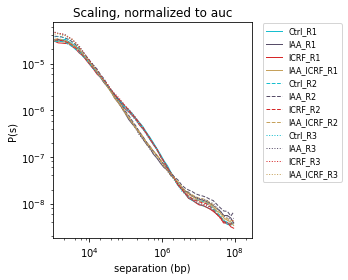

In [89]:
#normalized by auc
#scaling plot
fig = plt.figure(figsize=(5, 4))

for cond in conditions:
    dbins = np.array(output[cond]['Distbins'], dtype = float)
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    yfill = np.nan_to_num(y)
    auc = np.trapz(x, yfill)
    plt.plot(x[0:], y/-auc, label = cond, lw = 1, color = sampleColors[cond], ls = sampleLineStyles[cond])


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("P(s)")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':8})
plt.title('Scaling, normalized to auc')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)
locmajy = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajy)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locminy = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = f'{outDataDir}/figures/Rad21_MC3C_ScalingPlot_AllReads_Direct_Normalized.png'

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

/tmp/ipykernel_2912086/1929195338.py:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plt.plot(dx, scipy.ndimage.filters.gaussian_filter1d(dydx, 1.2), label = cond, lw = 1, color = sampleColors[cond],


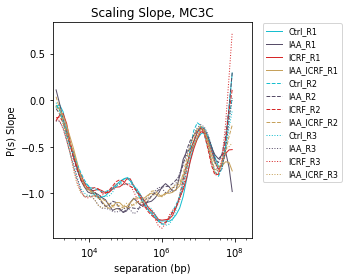

In [90]:
#derivative plot

fig = plt.figure(figsize=(5, 4))

for cond in conditions:
    dbins = output[cond]['Distbins']
    x = np.sqrt(dbins[:-1] * dbins[1:])
    y = output[cond]['Average']
    dydx = diff(np.log(y))/diff(np.log(x))
    dx = np.sqrt(x[:-1] * x[1:])
    plt.plot(dx, scipy.ndimage.filters.gaussian_filter1d(dydx, 1.2), label = cond, lw = 1, color = sampleColors[cond],
            ls = sampleLineStyles[cond])

ax = plt.gca()
ax.set_xscale('log')
plt.ylabel("P(s) Slope")
plt.xlabel("separation (bp)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1, prop = {'size':8})
plt.title('Scaling Slope, MC3C')

#fixing ticks
locmajx = mpl.ticker.LogLocator(base=10,numticks=6) 
ax.xaxis.set_major_locator(locmajx)

locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlim(1e3, 3e8)
#plt.ylim(1e-12, 1e-6)
plt.tight_layout()

fname = f'{outDataDir}/figures/Rad21_ScalingPlotSlope_AllReads_Direct.png'

plt.savefig(fname, dpi = 300, bbox_inches = "tight")

In [91]:
#Alignment length distribution

In [92]:
outDataDir

'..'

In [93]:
#read in alignments for each condition
alignmentDir = #directory_of_raw_alignments 

aligned_reads = pd.DataFrame()
for cond in conditions:
    df = pd.read_csv(f'{alignmentDir}/{long_names[cond]}.hg38.minimap2.output.paf', header = None,
                                  sep = '\t')
    df.columns = ['Query_Name', 'Query_Length', 'Query_Start', 'Query_End',
                                  'Strand', 'chrom', 'Target_ChrSize', 'start', 
                                  'end', 'Match_Length', 'Alignment_Length', 'Mapping_Quality', 
                  'TypeOfAln', 'NumberOfMinimizers', 'ChainingScorePrimary', 
                  'ChainingScoreSecondary', 'ApproxPerBaseDivergence', 'RepetitiveSeedLength'] 
    df['Condition'] = cond
    
    aligned_reads = aligned_reads.append(df).reset_index(drop = True)

/tmp/ipykernel_2912086/2531514585.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aligned_reads = aligned_reads.append(df).reset_index(drop = True)
/tmp/ipykernel_2912086/2531514585.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aligned_reads = aligned_reads.append(df).reset_index(drop = True)
/tmp/ipykernel_2912086/2531514585.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aligned_reads = aligned_reads.append(df).reset_index(drop = True)
/tmp/ipykernel_2912086/2531514585.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aligned_reads = aligned_reads.append(df).reset_index(drop = True)
/tmp/ipykernel_2912086/253151458

In [94]:
aligned_reads.head(20)

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,TypeOfAln,NumberOfMinimizers,ChainingScorePrimary,ChainingScoreSecondary,ApproxPerBaseDivergence,RepetitiveSeedLength,Condition
0,m54328U_210106_213143/57/ccs,3308,1716,3062,+,chr6,170805979,29997275,29998964,744,1699,45,tp:A:P,cm:i:123,s1:i:688,s2:i:532,dv:f:0.0489,rl:i:585,Ctrl_R1
1,m54328U_210106_213143/57/ccs,3308,846,1236,+,chr6,170805979,29955178,29955568,292,391,17,tp:A:P,cm:i:39,s1:i:292,s2:i:262,dv:f:0.0390,rl:i:585,Ctrl_R1
2,m54328U_210106_213143/57/ccs,3308,2,292,+,chr6,170805979,29914678,29914970,253,292,60,tp:A:P,cm:i:43,s1:i:253,s2:i:110,dv:f:0.0152,rl:i:585,Ctrl_R1
3,m54328U_210106_213143/57/ccs,3308,3061,3302,-,chr19,58617616,49654418,49654656,225,241,60,tp:A:P,cm:i:38,s1:i:225,s2:i:0,dv:f:0.0127,rl:i:585,Ctrl_R1
4,m54328U_210106_213143/57/ccs,3308,329,793,+,chr11,135086622,63754366,63754827,154,465,60,tp:A:P,cm:i:22,s1:i:154,s2:i:0,dv:f:0.0290,rl:i:585,Ctrl_R1
5,m54328U_210106_213143/57/ccs,3308,1566,1717,+,chr6,170805979,29991772,29991920,146,151,60,tp:A:P,cm:i:25,s1:i:146,s2:i:0,dv:f:0.0143,rl:i:585,Ctrl_R1
6,m54328U_210106_213143/57/ccs,3308,1246,1383,-,chr11,135086622,66159677,66159814,136,137,60,tp:A:P,cm:i:23,s1:i:136,s2:i:0,dv:f:0.0107,rl:i:585,Ctrl_R1
7,m54328U_210106_213143/57/ccs,3308,1443,1516,-,chr6,170805979,31105521,31105594,73,73,43,tp:A:P,cm:i:11,s1:i:73,s2:i:0,dv:f:0.0111,rl:i:585,Ctrl_R1
8,m54328U_210106_213143/81/ccs,5147,1156,2655,+,chr1,248956422,197924817,197926316,1499,1499,60,tp:A:P,cm:i:295,s1:i:1499,s2:i:0,dv:f:0.0005,rl:i:322,Ctrl_R1
9,m54328U_210106_213143/81/ccs,5147,2837,4211,+,chr1,248956422,199282028,199283402,1362,1374,60,tp:A:P,cm:i:233,s1:i:1362,s2:i:0,dv:f:0.0006,rl:i:322,Ctrl_R1


In [95]:
alignednum = aligned_reads.pivot_table(index = 'Condition', values = 'Query_Name', aggfunc = pd.Series.nunique)

In [96]:
alignednum

,Query_Name
Condition,
Ctrl_R1,62589
Ctrl_R2,150699
Ctrl_R3,283225
IAA_ICRF_R1,54387
IAA_ICRF_R2,151126
IAA_ICRF_R3,252219
IAA_R1,29857
IAA_R2,135026
IAA_R3,230042


In [97]:
fragmentnum = pd.DataFrame(aligned_reads.groupby(['Condition', 'Query_Name']).size()).reset_index()

In [98]:
fragmentnum.columns = ['Condition', 'Query_Name', 'Count']

In [99]:
repdict

{'Ctrl_R1': 'R1',
 'IAA_R1': 'R1',
 'ICRF_R1': 'R1',
 'IAA_ICRF_R1': 'R1',
 'Ctrl_R2': 'R2',
 'IAA_R2': 'R2',
 'ICRF_R2': 'R2',
 'IAA_ICRF_R2': 'R2',
 'Ctrl_R3': 'R3',
 'IAA_R3': 'R3',
 'ICRF_R3': 'R3',
 'IAA_ICRF_R3': 'R3'}

In [100]:
fragmentnum['Label'] = np.nan
fragmentnum['Replicate'] = np.nan

for cond in conditions:
    fragmentnum['Label'][fragmentnum['Condition'] == cond] = labeldict[cond]
    fragmentnum['Replicate'][fragmentnum['Condition'] == cond] = repdict[cond]

/tmp/ipykernel_2912086/1938586515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fragmentnum['Label'][fragmentnum['Condition'] == cond] = labeldict[cond]
/tmp/ipykernel_2912086/1938586515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fragmentnum['Replicate'][fragmentnum['Condition'] == cond] = repdict[cond]


In [101]:
fragmentnum

,Condition,Query_Name,Count,Label,Replicate
0,Ctrl_R1,m54328U_210106_213143/100007996/ccs,4,Control,R1
1,Ctrl_R1,m54328U_210106_213143/100008113/ccs,1,Control,R1
2,Ctrl_R1,m54328U_210106_213143/100008161/ccs,8,Control,R1
3,Ctrl_R1,m54328U_210106_213143/100008342/ccs,7,Control,R1
4,Ctrl_R1,m54328U_210106_213143/100008392/ccs,11,Control,R1
...,...,...,...,...,...
1812936,ICRF_R3,m54328U_211201_215028/99945145/ccs,4,ICRF-193,R3
1812937,ICRF_R3,m54328U_211201_215028/99945186/ccs,1,ICRF-193,R3
1812938,ICRF_R3,m54328U_211201_215028/99945202/ccs,1,ICRF-193,R3
1812939,ICRF_R3,m54328U_211201_215028/99945240/ccs,2,ICRF-193,R3


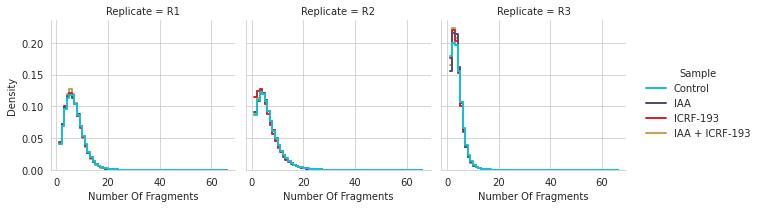

In [102]:
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])
with sns.axes_style("whitegrid"):
    g = sns.displot(kind='hist', data=fragmentnum, col='Replicate', x='Count', hue='Label', 
                    palette = cmap_bar, log_scale = False, common_norm = False, common_bins = True, 
                    lw = 2, facet_kws={'sharey': True}, height = 3, element = 'step', fill = False,
                    stat = 'density', binwidth = 1, hue_order = ['Control', 'IAA', 'ICRF-193', 'IAA + ICRF-193'])
    g._legend.set_title('Sample')
    g.set_xlabels('Number Of Fragments')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_Separate_Density_FragmentNumber_Kde_DropNA.png', bbox_inches = 'tight', dpi = 300)

In [103]:
#read length (query_length) of aligned reads

In [104]:
aligned_reads

,Query_Name,Query_Length,Query_Start,Query_End,Strand,chrom,Target_ChrSize,start,end,Match_Length,Alignment_Length,Mapping_Quality,TypeOfAln,NumberOfMinimizers,ChainingScorePrimary,ChainingScoreSecondary,ApproxPerBaseDivergence,RepetitiveSeedLength,Condition
0,m54328U_210106_213143/57/ccs,3308,1716,3062,+,chr6,170805979,29997275,29998964,744,1699,45,tp:A:P,cm:i:123,s1:i:688,s2:i:532,dv:f:0.0489,rl:i:585,Ctrl_R1
1,m54328U_210106_213143/57/ccs,3308,846,1236,+,chr6,170805979,29955178,29955568,292,391,17,tp:A:P,cm:i:39,s1:i:292,s2:i:262,dv:f:0.0390,rl:i:585,Ctrl_R1
2,m54328U_210106_213143/57/ccs,3308,2,292,+,chr6,170805979,29914678,29914970,253,292,60,tp:A:P,cm:i:43,s1:i:253,s2:i:110,dv:f:0.0152,rl:i:585,Ctrl_R1
3,m54328U_210106_213143/57/ccs,3308,3061,3302,-,chr19,58617616,49654418,49654656,225,241,60,tp:A:P,cm:i:38,s1:i:225,s2:i:0,dv:f:0.0127,rl:i:585,Ctrl_R1
4,m54328U_210106_213143/57/ccs,3308,329,793,+,chr11,135086622,63754366,63754827,154,465,60,tp:A:P,cm:i:22,s1:i:154,s2:i:0,dv:f:0.0290,rl:i:585,Ctrl_R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314095,m54328U_211201_215028/180554563/ccs,2107,7,1754,-,chr8,145138636,12373190,12374935,1707,1747,60,tp:A:P,cm:i:299,s1:i:1707,s2:i:1181,dv:f:0.0020,rl:i:98,IAA_ICRF_R3
8314096,m54328U_211201_215028/180554563/ccs,2107,1758,2103,+,chr8,145138636,12369784,12370129,338,345,0,tp:A:P,cm:i:58,s1:i:338,s2:i:338,dv:f:0.0044,rl:i:98,IAA_ICRF_R3
8314097,m54328U_211201_215028/180554576/ccs,4171,2,2767,-,chrM,16569,3699,6461,2742,2765,58,tp:A:P,cm:i:509,s1:i:2742,s2:i:2217,dv:f:0.0018,rl:i:116,IAA_ICRF_R3
8314098,m54328U_211201_215028/180554576/ccs,4171,3079,4163,+,chr16,90338345,80523105,80524189,1084,1084,60,tp:A:P,cm:i:196,s1:i:1084,s2:i:0,dv:f:0.0007,rl:i:116,IAA_ICRF_R3


In [105]:
read_length = pd.DataFrame(aligned_reads.groupby(['Condition', 'Query_Name']).mean('Query_Length')).reset_index()[['Condition', 'Query_Name', 'Query_Length']]

In [106]:
read_length

,Condition,Query_Name,Query_Length
0,Ctrl_R1,m54328U_210106_213143/100007996/ccs,6057.0
1,Ctrl_R1,m54328U_210106_213143/100008113/ccs,4756.0
2,Ctrl_R1,m54328U_210106_213143/100008161/ccs,6114.0
3,Ctrl_R1,m54328U_210106_213143/100008342/ccs,3869.0
4,Ctrl_R1,m54328U_210106_213143/100008392/ccs,6295.0
...,...,...,...
1812936,ICRF_R3,m54328U_211201_215028/99945145/ccs,3168.0
1812937,ICRF_R3,m54328U_211201_215028/99945186/ccs,2185.0
1812938,ICRF_R3,m54328U_211201_215028/99945202/ccs,918.0
1812939,ICRF_R3,m54328U_211201_215028/99945240/ccs,1975.0


In [107]:
read_length['Label'] = np.nan
read_length['Replicate'] = np.nan

for cond in conditions:
    read_length['Label'][read_length['Condition'] == cond] = labeldict[cond]
    read_length['Replicate'][read_length['Condition'] == cond] = repdict[cond]

/tmp/ipykernel_2912086/3440975477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_length['Label'][read_length['Condition'] == cond] = labeldict[cond]
/tmp/ipykernel_2912086/3440975477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_length['Replicate'][read_length['Condition'] == cond] = repdict[cond]


In [108]:
read_length

,Condition,Query_Name,Query_Length,Label,Replicate
0,Ctrl_R1,m54328U_210106_213143/100007996/ccs,6057.0,Control,R1
1,Ctrl_R1,m54328U_210106_213143/100008113/ccs,4756.0,Control,R1
2,Ctrl_R1,m54328U_210106_213143/100008161/ccs,6114.0,Control,R1
3,Ctrl_R1,m54328U_210106_213143/100008342/ccs,3869.0,Control,R1
4,Ctrl_R1,m54328U_210106_213143/100008392/ccs,6295.0,Control,R1
...,...,...,...,...,...
1812936,ICRF_R3,m54328U_211201_215028/99945145/ccs,3168.0,ICRF-193,R3
1812937,ICRF_R3,m54328U_211201_215028/99945186/ccs,2185.0,ICRF-193,R3
1812938,ICRF_R3,m54328U_211201_215028/99945202/ccs,918.0,ICRF-193,R3
1812939,ICRF_R3,m54328U_211201_215028/99945240/ccs,1975.0,ICRF-193,R3


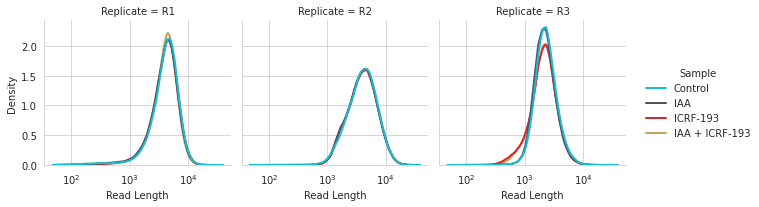

In [109]:
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])
with sns.axes_style("whitegrid"):
    g = sns.displot(kind='kde', data=read_length, col='Replicate', x='Query_Length', hue='Label', 
                    palette = cmap_bar, log_scale = True, common_norm = False, common_grid = True, 
                    lw = 2, facet_kws={'sharey': True}, height = 3, hue_order = ['Control', 'IAA', 'ICRF-193', 'IAA + ICRF-193'])
    g._legend.set_title('Sample')
    g.set_xlabels('Read Length')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_R1R2R3_Separate_Density_ReadLength_LogScaleKde.png', bbox_inches = 'tight', dpi = 300)

In [110]:
#run percent cis on pairs files
cis_percent = {}
for cond in conditions:
    pairs_full_sorted = pd.read_csv(f'{outDataDir}/data/{cond}_AllDirect_Sorted.pairs', 
                                          sep = '\t', header = None, comment = '#')
    pairs_full_sorted.columns = ['read_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'strand1', 'strand2']
    cis_count = len(pairs_full_sorted[pairs_full_sorted['chrom1'] == pairs_full_sorted['chrom2']])
    total_count = len(pairs_full_sorted)
    cis_percent[cond] = (cis_count/total_count) * 100
    

In [111]:
cis_percent

{'Ctrl_R1': 82.06865481268247,
 'IAA_R1': 75.7803060813532,
 'ICRF_R1': 82.23094005313165,
 'IAA_ICRF_R1': 78.091567407077,
 'Ctrl_R2': 80.05192624127487,
 'IAA_R2': 75.05176343069954,
 'ICRF_R2': 80.83608081517133,
 'IAA_ICRF_R2': 77.19797745535223,
 'Ctrl_R3': 79.74264278912038,
 'IAA_R3': 76.6227753393707,
 'ICRF_R3': 82.26863942827795,
 'IAA_ICRF_R3': 79.58873541790243}

In [112]:
#Intermingling plots

In [113]:
#For each of the above, can separate by A vs B compartments, or by number of chromosomes visited
comp_types = ['A', 'AB', 'B']

In [114]:
#load intermingling results as pickle file for later use since takes a long time to run
f = open(f'{outDataDir}/data/Rad21ICRF_R1R2R3_InterminglingSlideingWindowSweep.pkl', 'rb')
Intermingling_Sliding_Window_Sweep = pickle.load(f)
f.close()

In [115]:
Intermingling_Sliding_Window_Sweep_CT_Counts = {}

for window_size in [4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]:
    Intermingling_Sliding_Window_Sweep_CT_Counts[f'{window_size}'] = pd.crosstab(
        index=[Intermingling_Sliding_Window_Sweep[f'{window_size}']['Condition'],
               Intermingling_Sliding_Window_Sweep[f'{window_size}']['Window_Midpoint'],
               Intermingling_Sliding_Window_Sweep[f'{window_size}']['Label'],
               Intermingling_Sliding_Window_Sweep[f'{window_size}']['Replicate']
              ],
        columns=Intermingling_Sliding_Window_Sweep[f'{window_size}']['Walk_Comp_Type'], 
        normalize = False).reset_index().melt(id_vars = [
        'Condition', 
        'Window_Midpoint',
        'Label',
        'Replicate'
    ])

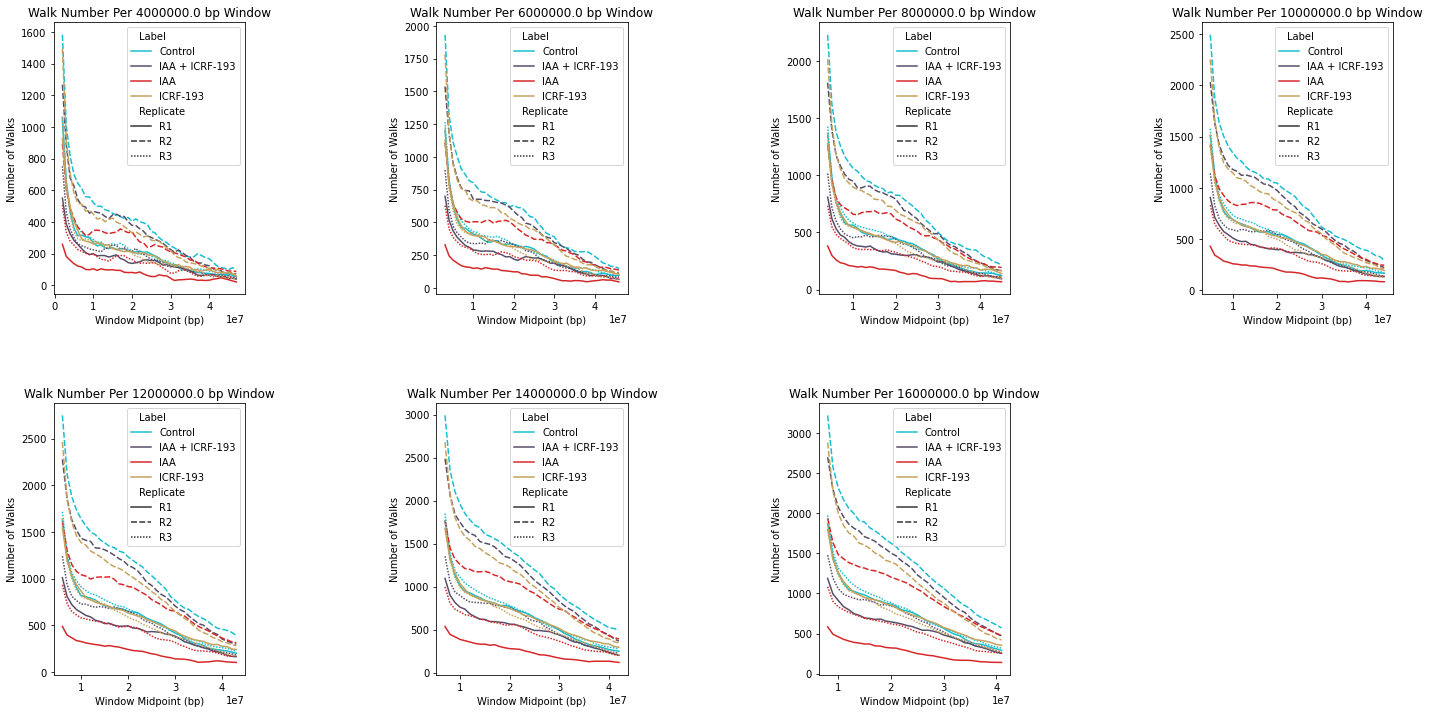

In [116]:
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(nrows= 2, ncols=4, wspace = 1, hspace = .4)
cmap_bar = sns.color_palette(['#17BECF','#574D68','#D62728','#C6A15B'])

for i, window_size in enumerate([4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]):
    ax = plt.subplot(gs[i])
    sns.lineplot(data = Intermingling_Sliding_Window_Sweep_CT_Counts[f'{window_size}'][
        Intermingling_Sliding_Window_Sweep_CT_Counts[f'{window_size}']['Walk_Comp_Type'] == 'All'], 
                 x = 'Window_Midpoint', y = 'value', hue = 'Label', style = 'Replicate', palette = cmap_bar)
    plt.ylabel('Number of Walks')
    plt.xlabel('Window Midpoint (bp)')
    plt.title(f'Walk Number Per {window_size} bp Window')
plt.savefig(f'{outDataDir}/figures/Rad21ICRF_AllSamples_WalkNumberPerWindow_AllComps_Separate_WindowSizeSweep.png', dpi = 300)

In [117]:
#Heatmaps of each comparison of interest

In [118]:
#for heatmaps - combine all replicates
Intermingling_Sliding_Window_Sweep_CT = {}

for window_size in [4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]:
    Intermingling_Sliding_Window_Sweep_CT[f'{window_size}'] = pd.crosstab(
        index=[Intermingling_Sliding_Window_Sweep[f'{window_size}']['Label'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Window_Midpoint'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Walk_Comp_Type'],
          ],
    columns=Intermingling_Sliding_Window_Sweep[f'{window_size}']['Inter_Largest_Step_Side_Step_Num'], 
    normalize = 'index').reset_index()


In [119]:
Intermingling_SlidingWindow_Melt_Sweep = {}

for window_size in [4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]:
    Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}'] = Intermingling_Sliding_Window_Sweep_CT[f'{window_size}'].melt(id_vars = [
    'Label', 
    'Window_Midpoint',
    'Walk_Comp_Type',
])


In [120]:
Intermingling_SlidingWindow_Sweep_ToPlot = {}
for window_size in [4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]:
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']= Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}'].loc[
        (Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}']['Inter_Largest_Step_Side_Step_Num'] == 2)
    ]

In [121]:
labels = ['Control', 'IAA', 'ICRF-193', 'IAA + ICRF-193']

In [122]:
Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.6e7}'].merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.4e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{1.6e7}', f'_{1.4e7}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.2e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num']).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{1.2e7}', f'_{1e7}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{8e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num']).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{6e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{8e6}', f'_{6e6}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{4e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'])

/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python

,Label,Window_Midpoint,Walk_Comp_Type,Inter_Largest_Step_Side_Step_Num,value_16000000.0,value_14000000.0,value_12000000.0,value_10000000.0,value_8000000.0,value_6000000.0,value
0,Control,8000000,A,2.0,0.489138,0.496254,0.500000,0.501931,0.502519,0.520833,0.551451
1,Control,8000000,AB,2.0,0.525303,0.525660,0.514876,0.525875,0.522167,0.508217,0.501961
2,Control,8000000,All,2.0,0.512112,0.517871,0.513997,0.518281,0.516639,0.518580,0.528462
3,Control,8000000,B,2.0,0.528856,0.534074,0.531124,0.527344,0.526050,0.534404,0.545139
4,Control,9000000,A,2.0,0.493827,0.498628,0.501264,0.497366,0.508892,0.513514,0.506596
...,...,...,...,...,...,...,...,...,...,...,...
731,ICRF-193,2000000,B,2,NaN,NaN,NaN,NaN,NaN,NaN,0.528807
732,ICRF-193,47000000,A,2,NaN,NaN,NaN,NaN,NaN,NaN,0.576271
733,ICRF-193,47000000,AB,2,NaN,NaN,NaN,NaN,NaN,NaN,0.651163
734,ICRF-193,47000000,All,2,NaN,NaN,NaN,NaN,NaN,NaN,0.588571


In [123]:
heatmap_df = Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.6e7}'].merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.4e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{1.6e7}', f'_{1.4e7}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1.2e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num']).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{1e7}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{1.2e7}', f'_{1e7}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{8e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num']).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{6e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num'], suffixes = (f'_{8e6}', f'_{6e6}')).merge(
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{4e6}'], how = 'outer', 
    on = ['Label', 'Window_Midpoint', 'Walk_Comp_Type', 
          'Inter_Largest_Step_Side_Step_Num']).sort_values(by = ['Label', 'Window_Midpoint', 'Walk_Comp_Type'])

heatmap_dfs_bylabel = {}

for cond in labels:
    df = heatmap_df[heatmap_df['Label'] == cond]
    
    df = df[(df['Walk_Comp_Type'] == 'All')][[
        'Window_Midpoint', 'value_16000000.0', 'value_14000000.0', 'value_12000000.0',
        'value_10000000.0', 'value_8000000.0','value_6000000.0', 'value']].set_index('Window_Midpoint', drop = True)

    df.columns = [16, 14, 12, 10, 8, 6, 4]

    heatmap_dfs_bylabel[cond] = df.transpose()
    heatmap_dfs_bylabel[cond].columns = list(range(2, 48))

/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
/home/eh37w/bin/miniconda3/envs/open2c_cooler0.5.1/lib/python

In [124]:
heatmap_dfs_bylabel

{'Control':         2         3         4         5         6         7         8   \
 16     NaN       NaN       NaN       NaN       NaN       NaN  0.512112   
 14     NaN       NaN       NaN       NaN       NaN  0.510142  0.517871   
 12     NaN       NaN       NaN       NaN  0.509344  0.514236  0.513997   
 10     NaN       NaN       NaN  0.511390  0.515284  0.513154  0.518281   
 8      NaN       NaN  0.511558  0.515355  0.517723  0.520652  0.516639   
 6      NaN  0.506821  0.520960  0.519562  0.522153  0.524747  0.518580   
 4   0.5046  0.512721  0.510529  0.536271  0.531014  0.520190  0.528462   
 
           9         10        11  ...        38        39        40        41  \
 16  0.515647  0.513508  0.520590  ...  0.516774  0.525398  0.527490  0.536379   
 14  0.516750  0.519254  0.515792  ...  0.525269  0.528746  0.532779  0.542694   
 12  0.522860  0.520369  0.517741  ...  0.532020  0.533471  0.545935  0.545060   
 10  0.517182  0.522178  0.520857  ...  0.540541  0.552826 

In [125]:
import cooltools.lib.plotting

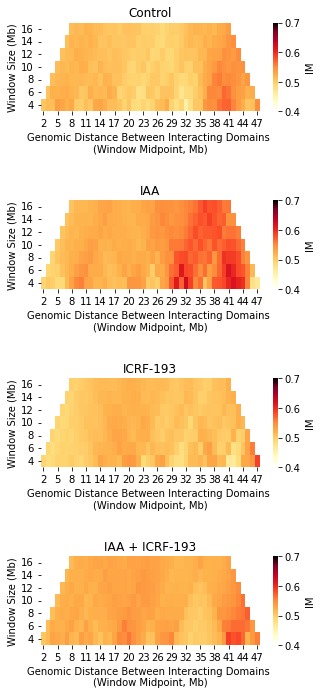

In [126]:
fig = plt.figure(figsize=(24, 18))

gs = GridSpec(nrows= 6, ncols=4, wspace = 0.3, hspace = 1)

for i, cond in enumerate(labels):
    ax = plt.subplot(gs[i, 0])
    sns.heatmap(heatmap_dfs_bylabel[cond], square = False, 
                vmin=0.4, 
                vmax=0.7, 
                cmap = 'fall', cbar_kws={'label': 'IM'},
                mask=heatmap_dfs_bylabel[cond].isnull())
    plt.ylabel('Window Size (Mb)')
    plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
    plt.title(cond)
    #ax.set_aspect('equal')
    
plt.savefig(f'{outDataDir}/figures/Heatmaps_SlidingWindowSweep_Rad21ICRF_AllChroms_AllCompTypes.png', dpi = 300, bbox_inches = 'tight')

In [127]:
#log2 ratios

In [128]:
ctrl_labels = ['Control', 'Control', 'Control', 'IAA', 'IAA', 'ICRF-193']
treat_labels = ['IAA', 'ICRF-193', 'IAA + ICRF-193', 'ICRF-193', 'IAA + ICRF-193', 'IAA + ICRF-193']

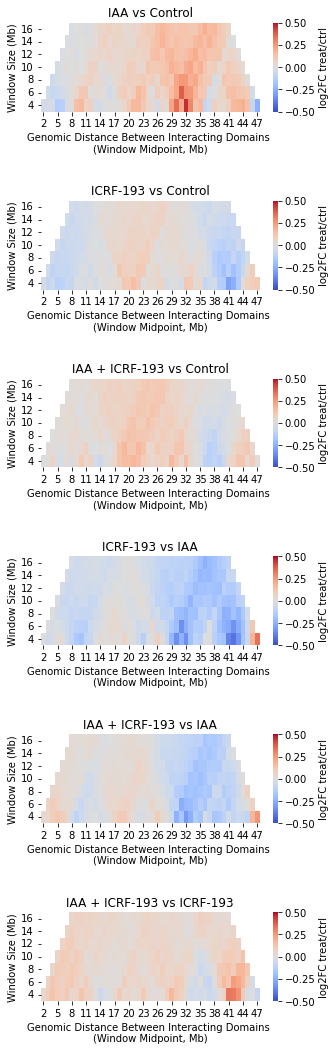

In [129]:
fig = plt.figure(figsize=(24, 18))

gs = GridSpec(nrows= 6, ncols=4, wspace = 0.3, hspace = 1)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = plt.subplot(gs[i, 0])
    log2df = np.log2(heatmap_dfs_bylabel[treatcond]) - np.log2(heatmap_dfs_bylabel[ctrlcond])                                      
    sns.heatmap(log2df, square = False, vmin=-.5, vmax=.5, cmap = 'coolwarm', cbar_kws={'label': 'log2FC treat/ctrl'})
    plt.ylabel('Window Size (Mb)')
    plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
    plt.title(f'{treatcond} vs {ctrlcond}')
    #ax.set_aspect('equal')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_InterminglingWindowSizeSweep_Heatmaps_TreatvsCtrl_AllComp.png', dpi = 300, bbox_inches = 'tight')

In [130]:
heatmap_dfs_bylabel_bycomp = {}

for cond in labels:
    heatmap_dfs_bylabel_bycomp[cond] = {}
    for comp in comp_types:
        df = heatmap_df[heatmap_df['Label'] == cond]

        df = df[(df['Walk_Comp_Type'] == comp)][[
            'Window_Midpoint', 'value_16000000.0', 'value_14000000.0', 'value_12000000.0',
            'value_10000000.0', 'value_8000000.0','value_6000000.0', 'value']].set_index('Window_Midpoint', drop = True)

        df.columns = [16, 14, 12, 10, 8, 6, 4]

        heatmap_dfs_bylabel_bycomp[cond][comp] = df.transpose()
        heatmap_dfs_bylabel_bycomp[cond][comp].columns = list(range(2, 48))

In [131]:
heatmap_dfs_bylabel_bycomp[cond][comp]

,2,3,4,5,6,7,8,9,10,11,...,38,39,40,41,42,43,44,45,46,47
16,NaN,NaN,NaN,NaN,NaN,NaN,0.525565,0.533764,0.534370,0.529148,...,0.544402,0.520833,0.549296,0.560000,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,0.527706,0.537600,0.536744,0.530653,0.533819,...,0.525114,0.543590,0.549451,0.556213,0.566265,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,0.528393,0.538869,0.541799,0.535756,0.536855,0.534504,...,0.541176,0.559006,0.549669,0.554054,0.574468,0.580882,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,0.529590,0.536729,0.544803,0.537415,0.543860,0.541985,0.528505,...,0.553957,0.547619,0.566929,0.569106,0.567797,0.577982,0.579439,NaN,NaN,NaN
8,NaN,NaN,0.529907,0.545455,0.549930,0.533654,0.548611,0.545624,0.535645,0.519038,...,0.533333,0.561905,0.571429,0.587629,0.571429,0.561798,0.586207,0.597561,NaN,NaN
6,NaN,0.523717,0.549933,0.555172,0.548583,0.557778,0.542254,0.540146,0.517060,0.520548,...,0.535714,0.558442,0.586667,0.575758,0.588235,0.579710,0.578125,0.593750,0.573770,NaN
4,0.514977,0.532773,0.549296,0.559322,0.570533,0.570946,0.550877,0.500000,0.521401,0.514523,...,0.555556,0.555556,0.555556,0.586957,0.590909,0.627907,0.586957,0.534884,0.581395,0.564103


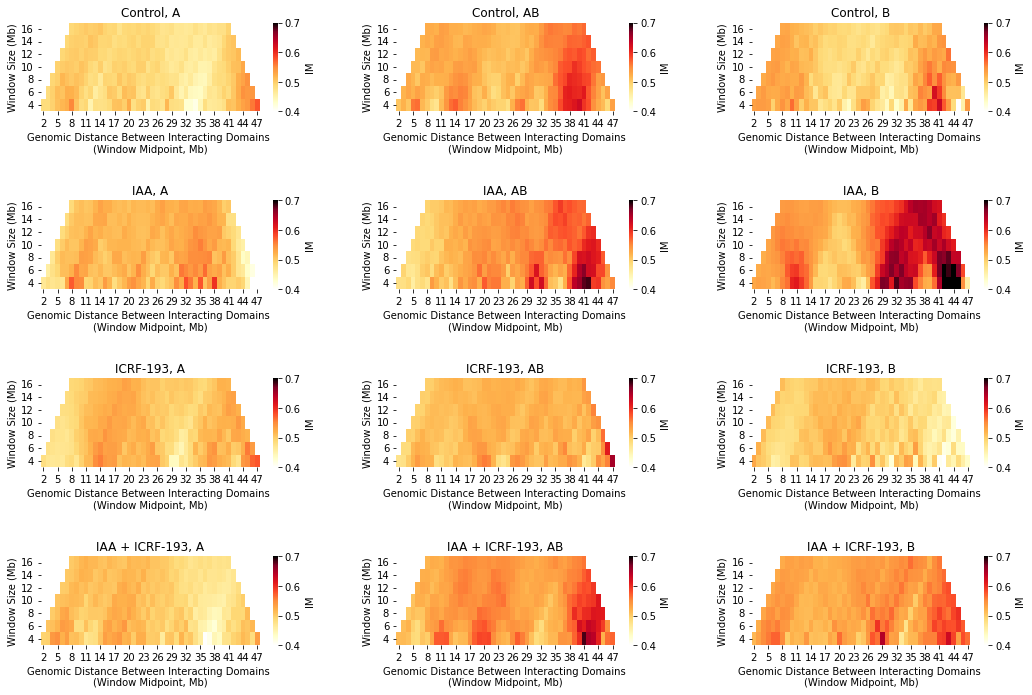

In [132]:
fig = plt.figure(figsize=(24, 18))

gs = GridSpec(nrows= 6, ncols=4, wspace = 0.3, hspace = 1)

for i, cond in enumerate(labels):
    for j, comp in enumerate(comp_types):
        ax = plt.subplot(gs[i, j])
        sns.heatmap(heatmap_dfs_bylabel_bycomp[cond][comp], square = False, 
                vmin=0.4, 
                vmax=0.7, 
                cmap = 'fall', cbar_kws={'label': 'IM'},
                mask=heatmap_dfs_bylabel_bycomp[cond][comp].isnull())
        plt.ylabel('Window Size (Mb)')
        plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
        plt.title(f'{cond}, {comp}')

plt.savefig(f'{outDataDir}/figures/Heatmaps_SlidingWindowSweep_Rad21ICRF_AllChroms_ByComp.png', dpi = 300, bbox_inches = 'tight')

In [133]:
#log2 ratios

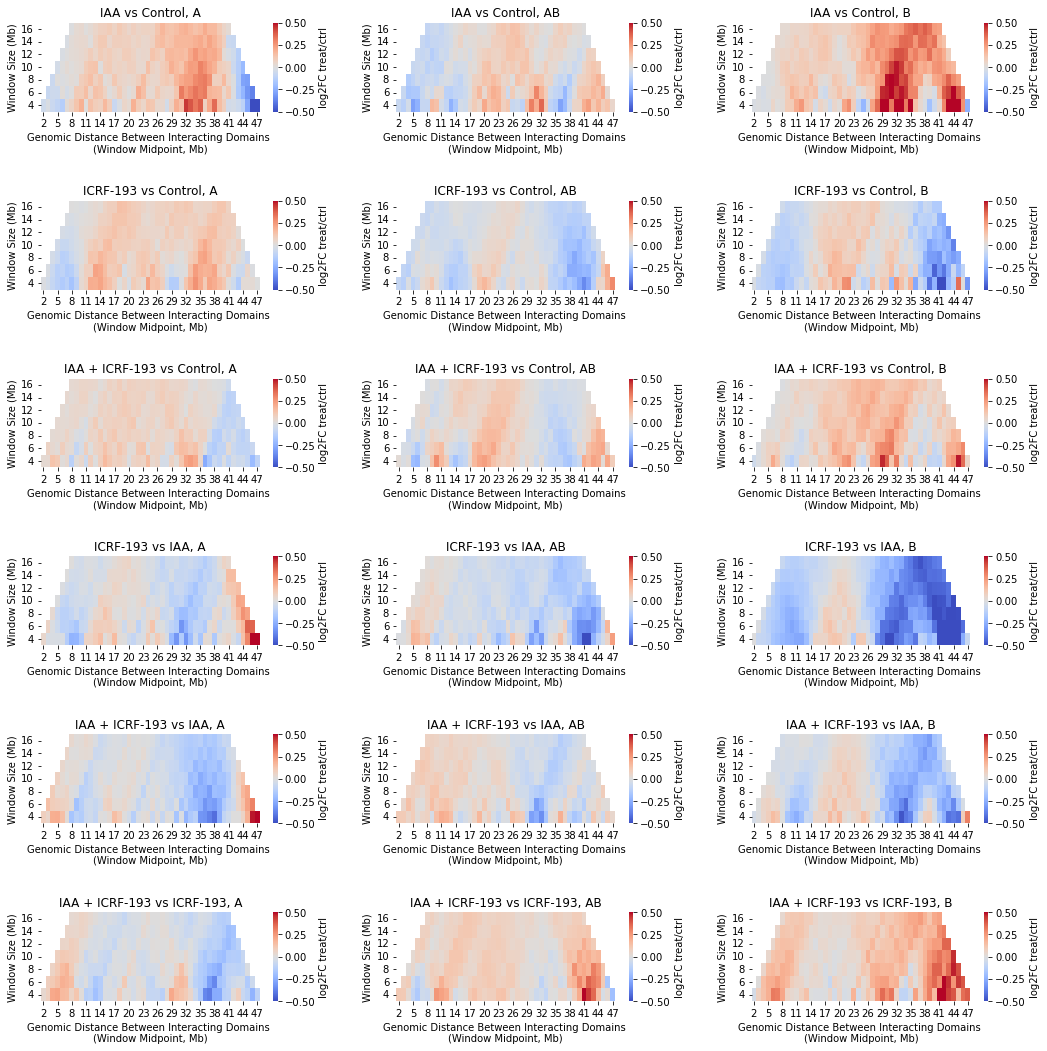

In [134]:
fig = plt.figure(figsize=(24, 18))

gs = GridSpec(nrows= 6, ncols=4, wspace = 0.3, hspace = 1)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    for j, comp in enumerate(comp_types):
        ax = plt.subplot(gs[i, j])
        log2df = np.log2(heatmap_dfs_bylabel_bycomp[treatcond][comp]) - np.log2(heatmap_dfs_bylabel_bycomp[ctrlcond][comp])                                      
        sns.heatmap(log2df, square = False, vmin=-.5, vmax=.5, cmap = 'coolwarm', cbar_kws={'label': 'log2FC treat/ctrl'})
        plt.ylabel('Window Size (Mb)')
        plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
        plt.title(f'{treatcond} vs {ctrlcond}, {comp}')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_InterminglingWindowSizeSweep_Heatmaps_TreatvsCtrl_ByComp.png', dpi = 300, bbox_inches = 'tight')

In [135]:
#only 12Mb line of heatmap

In [136]:
df_12mb_only = pd.DataFrame()

for cond in labels:
    df_12mb_only = df_12mb_only.append(heatmap_dfs_bylabel[cond].loc[12])

/tmp/ipykernel_2912086/2149929643.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only = df_12mb_only.append(heatmap_dfs_bylabel[cond].loc[12])
/tmp/ipykernel_2912086/2149929643.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only = df_12mb_only.append(heatmap_dfs_bylabel[cond].loc[12])
/tmp/ipykernel_2912086/2149929643.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only = df_12mb_only.append(heatmap_dfs_bylabel[cond].loc[12])
/tmp/ipykernel_2912086/2149929643.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only = df_12mb_only.append(heatmap_dfs_bylabel[cond].loc[12])


In [137]:
df_12mb_only.index = labels

In [138]:
df_12mb_only.dropna(axis = 'columns')

,6,7,8,9,10,11,12,13,14,15,...,34,35,36,37,38,39,40,41,42,43
Control,0.509344,0.514236,0.513997,0.522860,0.520369,0.517741,0.515181,0.513046,0.511194,0.509434,...,0.507053,0.515944,0.515571,0.529899,0.532020,0.533471,0.545935,0.545060,0.537844,0.551046
IAA,0.505614,0.512979,0.518039,0.516337,0.520329,0.523634,0.525690,0.526230,0.530147,0.523153,...,0.581019,0.570197,0.575758,0.574967,0.577236,0.580737,0.557576,0.562701,0.562290,0.556701
ICRF-193,0.493357,0.490187,0.495604,0.500306,0.504086,0.505442,0.506864,0.508267,0.511259,0.518743,...,0.504348,0.501852,0.504390,0.507724,0.505519,0.507463,0.514888,0.509728,0.511050,0.522694
IAA + ICRF-193,0.515245,0.522538,0.526899,0.520678,0.521661,0.526815,0.520996,0.520591,0.531201,0.529996,...,0.510601,0.507505,0.512243,0.521008,0.523810,0.527512,0.530799,0.535764,0.540862,0.550000


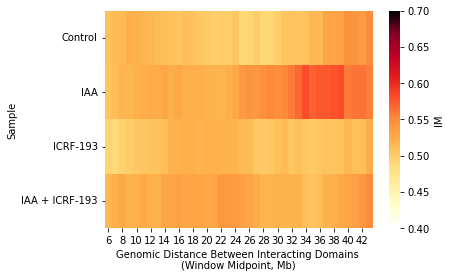

In [139]:
sns.heatmap(
    df_12mb_only.dropna(axis = 'columns'), 
    square = False,       
    vmin=0.4,                 
    vmax=0.7,               
    cmap = 'fall', 
    cbar_kws={'label': 'IM'},                
    #mask=df_12mb_only.isnull()
)
plt.ylabel('Sample')
plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
plt.savefig(f'{outDataDir}/figures/IMHeatmap_12MbWindow.png', dpi = 300, bbox_inches = 'tight')

In [140]:
#12Mb heatmap by compartment type

In [141]:
df_12mb_only_AA = pd.DataFrame()

for cond in labels:
    df_12mb_only_AA = df_12mb_only_AA.append(heatmap_dfs_bylabel_bycomp[cond]['A'].loc[12])

/tmp/ipykernel_2912086/1343561689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AA = df_12mb_only_AA.append(heatmap_dfs_bylabel_bycomp[cond]['A'].loc[12])
/tmp/ipykernel_2912086/1343561689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AA = df_12mb_only_AA.append(heatmap_dfs_bylabel_bycomp[cond]['A'].loc[12])
/tmp/ipykernel_2912086/1343561689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AA = df_12mb_only_AA.append(heatmap_dfs_bylabel_bycomp[cond]['A'].loc[12])
/tmp/ipykernel_2912086/1343561689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AA = df_12mb_only_AA.ap

In [142]:
df_12mb_only_AA.index = labels

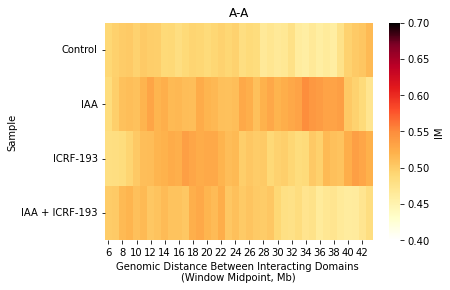

In [143]:
sns.heatmap(
    df_12mb_only_AA.dropna(axis = 'columns'), 
    square = False,       
    vmin=0.4,                 
    vmax=0.7,               
    cmap = 'fall', 
    cbar_kws={'label': 'IM'},                
    #mask=df_12mb_only.isnull()
)
plt.ylabel('Sample')
plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
plt.title('A-A')
plt.savefig(f'{outDataDir}/figures/AA_IMHeatmap_12MbWindow.png', dpi = 300, bbox_inches = 'tight')

In [144]:
df_12mb_only_BB = pd.DataFrame()

for cond in labels:
    df_12mb_only_BB = df_12mb_only_BB.append(heatmap_dfs_bylabel_bycomp[cond]['B'].loc[12])

/tmp/ipykernel_2912086/1329630842.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_BB = df_12mb_only_BB.append(heatmap_dfs_bylabel_bycomp[cond]['B'].loc[12])
/tmp/ipykernel_2912086/1329630842.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_BB = df_12mb_only_BB.append(heatmap_dfs_bylabel_bycomp[cond]['B'].loc[12])
/tmp/ipykernel_2912086/1329630842.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_BB = df_12mb_only_BB.append(heatmap_dfs_bylabel_bycomp[cond]['B'].loc[12])
/tmp/ipykernel_2912086/1329630842.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_BB = df_12mb_only_BB.ap

In [145]:
df_12mb_only_BB.index = labels

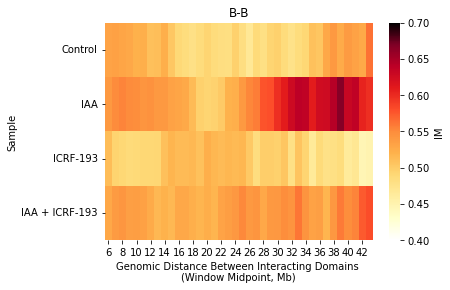

In [146]:
sns.heatmap(
    df_12mb_only_BB.dropna(axis = 'columns'), 
    square = False,       
    vmin=0.4,                 
    vmax=0.7,                 
    cmap = 'fall', 
    cbar_kws={'label': 'IM'},                
    #mask=df_12mb_only.isnull()
)
plt.ylabel('Sample')
plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
plt.title('B-B')
plt.savefig(f'{outDataDir}/figures/BB_IMHeatmap_12MbWindow.png', dpi = 300, bbox_inches = 'tight')

In [147]:
df_12mb_only_AB = pd.DataFrame()

for cond in labels:
    df_12mb_only_AB = df_12mb_only_AB.append(heatmap_dfs_bylabel_bycomp[cond]['AB'].loc[12])

/tmp/ipykernel_2912086/529416454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AB = df_12mb_only_AB.append(heatmap_dfs_bylabel_bycomp[cond]['AB'].loc[12])
/tmp/ipykernel_2912086/529416454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AB = df_12mb_only_AB.append(heatmap_dfs_bylabel_bycomp[cond]['AB'].loc[12])
/tmp/ipykernel_2912086/529416454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AB = df_12mb_only_AB.append(heatmap_dfs_bylabel_bycomp[cond]['AB'].loc[12])
/tmp/ipykernel_2912086/529416454.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_12mb_only_AB = df_12mb_only_AB.app

In [148]:
df_12mb_only_AB.index = labels

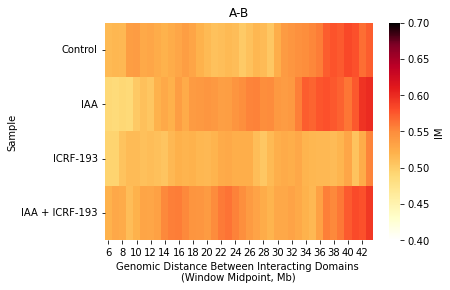

In [149]:
sns.heatmap(
    df_12mb_only_AB.dropna(axis = 'columns'), 
    square = False,       
    vmin=0.4,                 
    vmax=0.7,               
    cmap = 'fall', 
    cbar_kws={'label': 'IM'},                
    #mask=df_12mb_only.isnull()
)
plt.ylabel('Sample')
plt.xlabel('Genomic Distance Between Interacting Domains \n(Window Midpoint, Mb)')
plt.title('A-B')
plt.savefig(f'{outDataDir}/figures/AB_IMHeatmap_12MbWindow.png', dpi = 300, bbox_inches = 'tight')

In [150]:
#Making plots for figure comparing real vs permuted intermingling metric

In [151]:
comp_types = ['A', 'B', 'AB']
window_sizes = [4e6, 6e6, 8e6, 1e7, 1.2e7, 1.4e7, 1.6e7]

In [152]:
#read in pickled intermingling data
f = open(f'{outDataDir}/data/Rad21ICRF_R1R2R3_InterminglingSlideingWindowSweep.pkl', 'rb')
Intermingling_Sliding_Window_Sweep = pickle.load(f)
f.close()

In [153]:
Intermingling_Sliding_Window_Sweep_CT = {}

for window_size in window_sizes:
    Intermingling_Sliding_Window_Sweep_CT[f'{window_size}'] = pd.crosstab(
        index=[Intermingling_Sliding_Window_Sweep[f'{window_size}']['Condition'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Window_Midpoint'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Label'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Walk_Comp_Type'],
           Intermingling_Sliding_Window_Sweep[f'{window_size}']['Replicate']
          ],
    columns=Intermingling_Sliding_Window_Sweep[f'{window_size}']['Inter_Largest_Step_Side_Step_Num'], 
    normalize = 'index').reset_index()


In [154]:
Intermingling_SlidingWindow_Melt_Sweep = {}

for window_size in window_sizes:
    Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}'] = Intermingling_Sliding_Window_Sweep_CT[f'{window_size}'].melt(id_vars = [
    'Condition', 
    'Window_Midpoint',
    'Label',
    'Walk_Comp_Type',
    'Replicate'
])


In [155]:
Intermingling_SlidingWindow_Sweep_ToPlot = {}
for window_size in window_sizes:
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']= Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}'].loc[
        (Intermingling_SlidingWindow_Melt_Sweep[f'{window_size}']['Inter_Largest_Step_Side_Step_Num'] == 2)
    ]

In [156]:
#permutations
iterations = range(100)

#read in pickled intermingling data for each, extract data to plot
Permuted_Intermingling_SlidingWindow_Sweep_ToPlot = {}

for window_size in window_sizes:
    Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = pd.DataFrame()

for i in iterations:
    for window_size in window_sizes:
        #run crosstab for each iteration, each window size, melt, and combine into full dataframe
        #read in pickled intermingling data
        f = open(f'{outDataDir}/data/permutations/Rad21ICRF_R1R2R3_PermutedInterminglingSlidingWindowSweep_window{window_size}.iter{i}.pkl', 'rb')
        Permuted_Intermingling_Sliding_Window_Sweep_OneSize = pickle.load(f)
        f.close()
        Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Iteration'] = i
        
        Permuted_CT = pd.crosstab(
            index=[
                Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Condition'],
                Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Window_Midpoint'],
                Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Label'],
                Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Iteration'],
                Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Walk_Comp_Type']
              ],
            columns=Permuted_Intermingling_Sliding_Window_Sweep_OneSize['Inter_Largest_Step_Side_Step_Num'], 
            normalize = 'index').reset_index()

        Permuted_Melt = Permuted_CT.melt(id_vars = [
            'Condition', 
            'Window_Midpoint',
            'Label',
            'Iteration',
            'Walk_Comp_Type'
        ])

        Permuted_ToPlot = Permuted_Melt.loc[
            (Permuted_Melt['Inter_Largest_Step_Side_Step_Num'] == 2)]

        Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
            f'{window_size}'].append(Permuted_ToPlot, ignore_index = True)

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'] = Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[
/tmp/ipykernel_2912086/2916820675.py:41: FutureWarning: The frame.append method is deprecated and will be rem

In [157]:
Intermingling_BothWalkTypes_ToPlot = {}

for window_size in window_sizes:
    Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']['Walk_Type'] = 'Permuted'
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']['Walk_Type'] = 'Real'
    Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']['Iteration'] = np.nan
    
    Intermingling_BothWalkTypes_ToPlot[f'{window_size}'] = Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'].append(Permuted_Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}'], ignore_index = True)

    Intermingling_BothWalkTypes_ToPlot[f'{window_size}'].columns = ['Condition', 'Window Midpoint', 'Sample', 'Walk_Comp_Type', 'Replicate',
       'Inter_Largest_Step_Side_Step_Num', 'Fraction Intermingled', 'Walk Type', 'Iteration']
    
    Intermingling_BothWalkTypes_ToPlot[f'{window_size}']['Window Size'] = window_size


/tmp/ipykernel_2912086/642797336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']['Walk_Type'] = 'Real'
/tmp/ipykernel_2912086/642797336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Intermingling_SlidingWindow_Sweep_ToPlot[f'{window_size}']['Iteration'] = np.nan
/tmp/ipykernel_2912086/642797336.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Interm

In [158]:
Intermingling_BothWalkTypes_ToPlot_AllWindowSizes = pd.DataFrame()
for window_size in window_sizes:
    Intermingling_BothWalkTypes_ToPlot_AllWindowSizes = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes.append(Intermingling_BothWalkTypes_ToPlot[f'{window_size}'])

/tmp/ipykernel_2912086/1079530717.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Intermingling_BothWalkTypes_ToPlot_AllWindowSizes = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes.append(Intermingling_BothWalkTypes_ToPlot[f'{window_size}'])
/tmp/ipykernel_2912086/1079530717.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Intermingling_BothWalkTypes_ToPlot_AllWindowSizes = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes.append(Intermingling_BothWalkTypes_ToPlot[f'{window_size}'])
/tmp/ipykernel_2912086/1079530717.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Intermingling_BothWalkTypes_ToPlot_AllWindowSizes = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes.append(Intermingling_BothWalkTypes_ToPlot[f'{wi

In [159]:
ctrl_labels = ['Control', 'Control', 'Control', 'IAA', 'IAA', 'ICRF-193']
treat_labels = ['IAA', 'ICRF-193', 'IAA + ICRF-193', 'ICRF-193', 'IAA + ICRF-193', 'IAA + ICRF-193']

<Figure size 216x144 with 0 Axes>

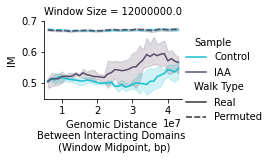

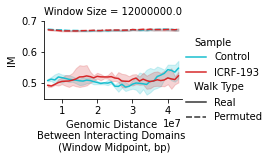

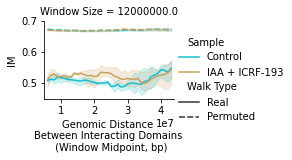

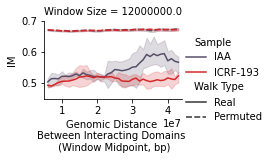

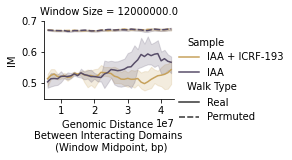

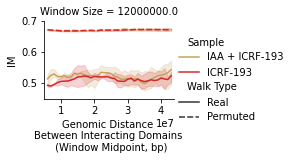

In [160]:
#12Mb window only, all comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'All'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.45, 0.7)
    plt.xlim(0.5e7, 4.4e7)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AllComps_{i}_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

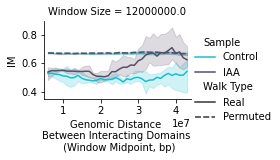

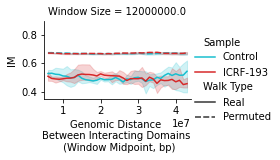

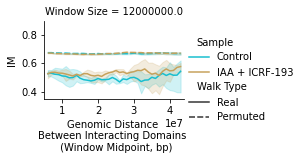

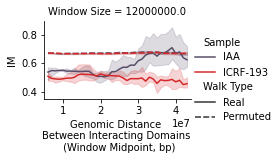

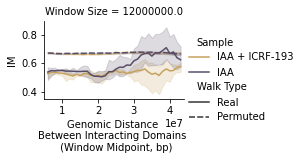

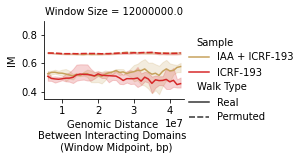

In [161]:
#12Mb window only, B comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'B'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.35, 0.9)
    plt.xlim(0.5e7, 4.4e7)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_BComp_{i}_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

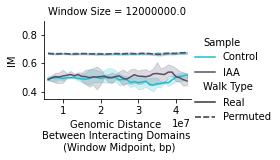

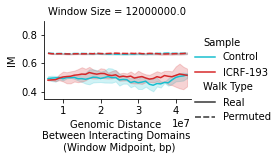

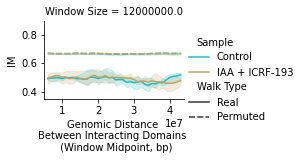

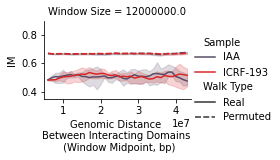

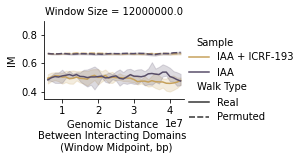

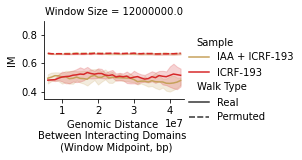

In [162]:
#12Mb window only, A comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'A'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.35, 0.9)
    plt.xlim(0.5e7, 4.4e7)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AComp_{i}_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

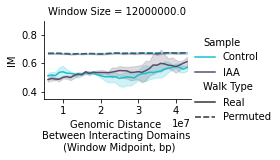

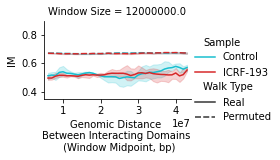

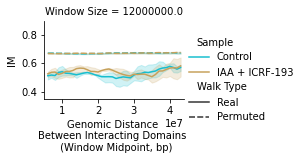

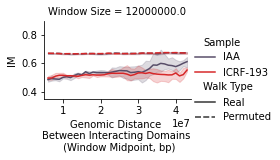

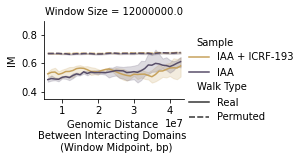

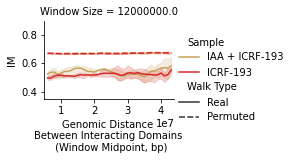

In [163]:
#12Mb window only, AB comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'AB'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.35, 0.9)
    plt.xlim(0.5e7, 4.4e7)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_ABComp_{i}_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

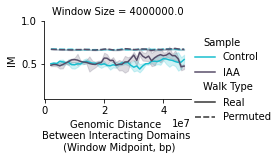

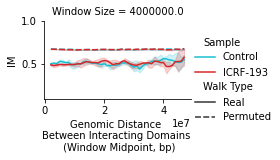

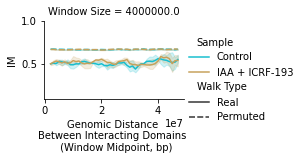

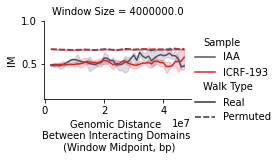

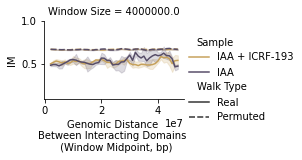

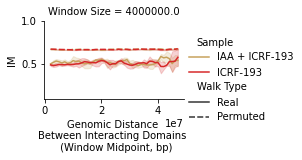

In [164]:
#4Mb window only, all comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'All'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.1, 1)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AllComp_{i}_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

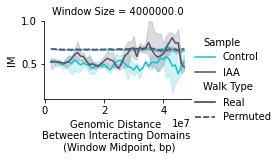

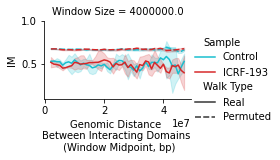

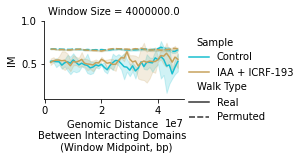

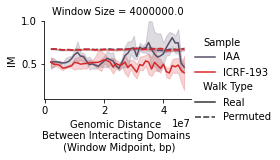

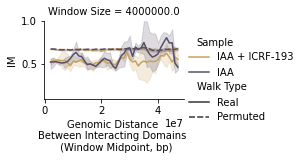

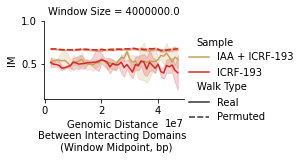

In [165]:
#4Mb window only, B comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'B'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.1, 1)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_BComp_{i}_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

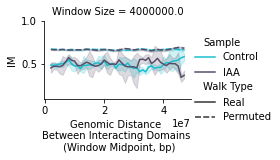

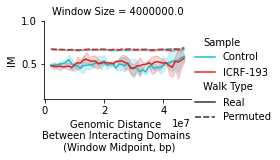

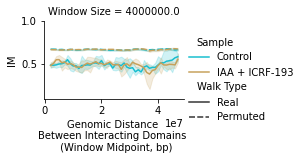

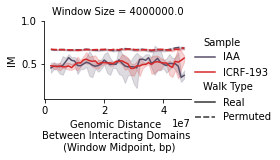

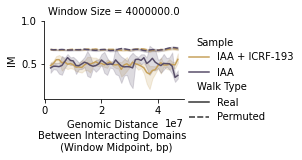

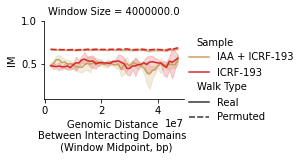

In [166]:
#4Mb window only, A comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'A'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.1, 1)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AComp_{i}_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 216x144 with 0 Axes>

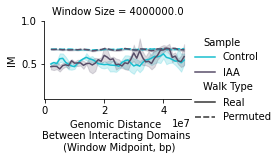

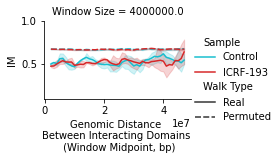

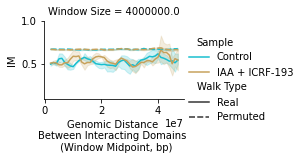

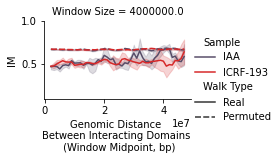

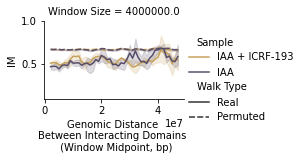

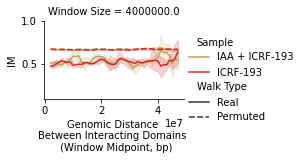

In [167]:
#4Mb window only, AB comp types

fig = plt.figure(figsize=(3, 2))
gs = GridSpec(nrows= 10, ncols=1, wspace = 1, hspace = .4)

for i, (ctrlcond, treatcond) in enumerate(zip(ctrl_labels, treat_labels)):
    ax = gs[i]
    df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin([ctrlcond, treatcond])) &
        (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6)
    ]
    cmap_bar = sns.color_palette([labelPlotColors[df['Sample'].unique()[0]], labelPlotColors[df['Sample'].unique()[1]]])
    sns.relplot(data = df[df['Walk_Comp_Type'] == 'AB'],
             x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
                style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25)
    plt.ylim(0.1, 1)
    plt.xlabel('Genomic Distance \nBetween Interacting Domains \n (Window Midpoint, bp)')
    plt.ylabel('IM')

    plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_ABComp_{i}_4MbWindows.png', dpi = 300, bbox_inches = "tight")

In [20]:
labels = ['Control', 'IAA', 'ICRF-193', 'IAA + ICRF-193']

<Figure size 432x288 with 0 Axes>

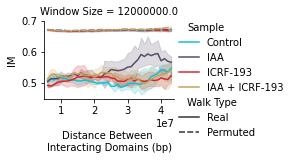

In [45]:
#12Mb window only, all comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'All'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.45, 0.7)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AllComps_12MbWindows.png', dpi = 300, bbox_inches = "tight")

In [46]:
labels_plot2 = ['ICRF-193', 'IAA']
label_colors_plot2 = {}
for cond in labels_plot2:
    label_colors_plot2[cond] = labelPlotColors[cond]

<Figure size 432x288 with 0 Axes>

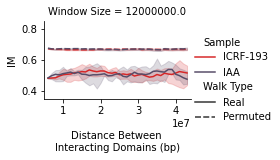

In [47]:
#12Mb window only, A

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels_plot2))
]
cmap_bar = sns.color_palette(label_colors_plot2.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'A'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels_plot2)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AComp_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

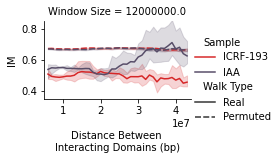

In [48]:
#12Mb window only, B

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels_plot2))
]
cmap_bar = sns.color_palette(label_colors_plot2.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'B'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels_plot2)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_BComp_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

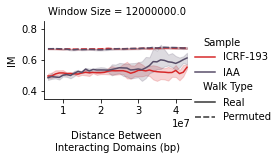

In [49]:
#12Mb window only, AB

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels_plot2))
]
cmap_bar = sns.color_palette(label_colors_plot2.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'AB'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels_plot2)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_ABComp_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

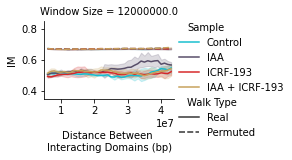

In [57]:
#12Mb window only, all comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'All'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AllComps_AllSamples_LargeYScale_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

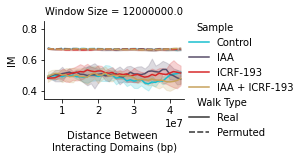

In [50]:
#12Mb window only, A comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'A'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AComps_AllSamples_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

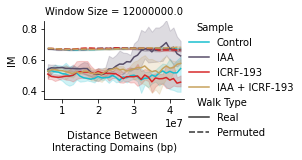

In [51]:
#12Mb window only, B comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'B'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_BComps_AllSamples_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

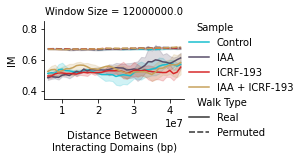

In [52]:
#12Mb window only, AB comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 12e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'AB'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.35, 0.85)
plt.xlim(0.5e7, 4.4e7)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_ABComps_AllSamples_12MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

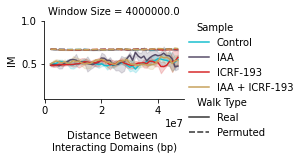

In [53]:
#4Mb window only, all comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'All'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.1, 1)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AllComps_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

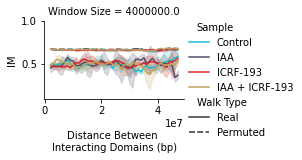

In [54]:
#4Mb window only, A comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'A'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.1, 1)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_AComps_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

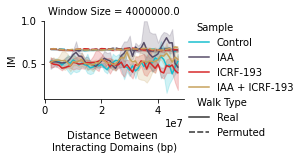

In [55]:
#4Mb window only, B comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'B'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.1, 1)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_BComps_4MbWindows.png', dpi = 300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

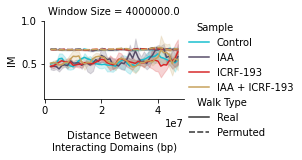

In [56]:
#4Mb window only, AB comp types

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(nrows= 1, ncols=1, wspace = 1, hspace = .4)

df = Intermingling_BothWalkTypes_ToPlot_AllWindowSizes[
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Window Size'] == 4e6) &
    (Intermingling_BothWalkTypes_ToPlot_AllWindowSizes['Sample'].isin(labels))
]
cmap_bar = sns.color_palette(labelPlotColors.values())
sns.relplot(data = df[df['Walk_Comp_Type'] == 'AB'],
            x = 'Window Midpoint', y = 'Fraction Intermingled', hue = 'Sample', palette = cmap_bar, kind = 'line', 
            style = 'Walk Type', col = 'Window Size', height = 2, aspect = 1.5, seed = 25, 
            hue_order = labels)
plt.ylim(0.1, 1)
plt.xlabel('\nDistance Between \nInteracting Domains (bp)')
plt.ylabel('IM')

plt.savefig(f'{outDataDir}/figures/Rad21ICRF_FractionIntermingled_RealvsPermuted_ABComps_4MbWindows.png', dpi = 300, bbox_inches = "tight")